## Dataset
### Features:
- Id: Unique identifier for each data entry.
- Pregnancies: Number of times pregnant.
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
- BloodPressure: Diastolic blood pressure (mm Hg).
- SkinThickness: Triceps skinfold thickness (mm).
- Insulin: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index (weight in kg / height in m^2).
- DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
- Age: Age in years.
- Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.


### I) Data Preprocessing

#### Step 1: Importing necesasry libraries & reading dataset

In [1]:
!pip install shap

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

In [3]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from pycaret.classification import *
from sklearn.utils import shuffle

In [4]:
# Read dataset
df=pd.read_csv(r"F:\Fall 2023\Introduction to Python Programming for Data Analytics\project\submitted\Diabetes\Diabetes.csv")

In [5]:
# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);  # to display all columns and rows
pd.set_option('display.float_format', lambda x: '%.2f' % x) # The number of numbers that will be shown after the comma.

In [6]:
# Show 1st 5 columns
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.60,0.63,50,1
1,2,1,85,66,29,0,26.60,0.35,31,0
2,3,8,183,64,0,0,23.30,0.67,32,1
3,4,1,89,66,23,94,28.10,0.17,21,0
4,5,0,137,40,35,168,43.10,2.29,33,1


In [7]:
# Dataset shape
df.shape

(2768, 10)

In [8]:
# Drop the Id column (it is redundant)
df.drop('Id', axis=1, inplace=True)  

###### Note:
- Dataset has 2768 record and 10 columns.
- The id column is redundant, so it is dropped final shape will be (2768,9)

#### Step 2: Insight about the Dataset

In [9]:
# See dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [10]:
# Checking missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.00,2768.00,2768.00,2768.00,2768.00,2768.00,2768.00,2768.00,2768.00
mean,3.74,121.10,69.13,20.82,80.13,32.14,0.47,33.13,0.34
std,3.32,32.04,19.23,16.06,112.30,8.08,0.33,11.78,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,37.00,32.20,0.38,29.00,0.00
75%,6.00,141.00,80.00,32.00,130.00,36.62,0.62,40.00,1.00
max,17.00,199.00,122.00,110.00,846.00,80.60,2.42,81.00,1.00


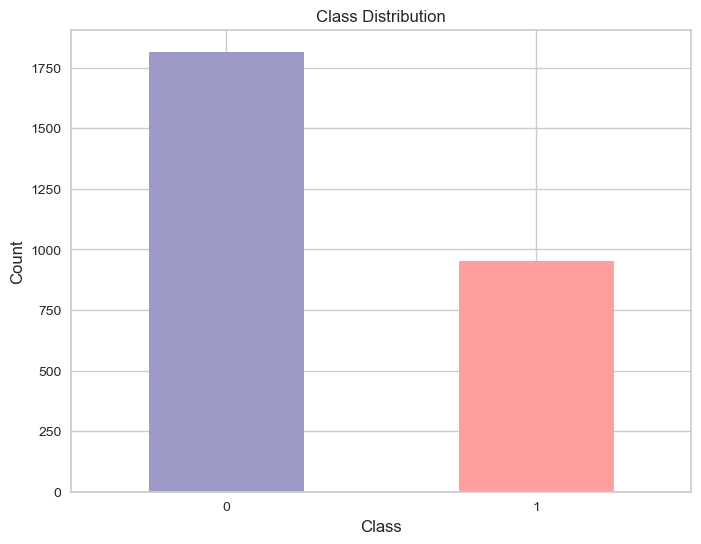

In [12]:
# Check class distribution
class_distribution = df['Outcome'].value_counts()

# Define sober colors for the bar chart
bar_colors = ['#9e9ac8', '#ff9e9e']

# Plot a bar chart
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=bar_colors)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [13]:
df.Outcome.value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

Dataset is imbalance

###### Note: Dataset Findings

- no null values
- Raw dataset shape: 2768 rows , 9 features
- Class imbalance for binary class: 0 (1816) and 1(952)


### II) Exploratory Data Analysis

#### Step 1: Feature visualization and analysis

#### A) Pregnancies

In [14]:
# Unique values in Pregnancies:
unique_values_Pregnancies = pd.Series(df['Pregnancies'].unique()).sort_values().values
unique_values_Pregnancies

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17],
      dtype=int64)

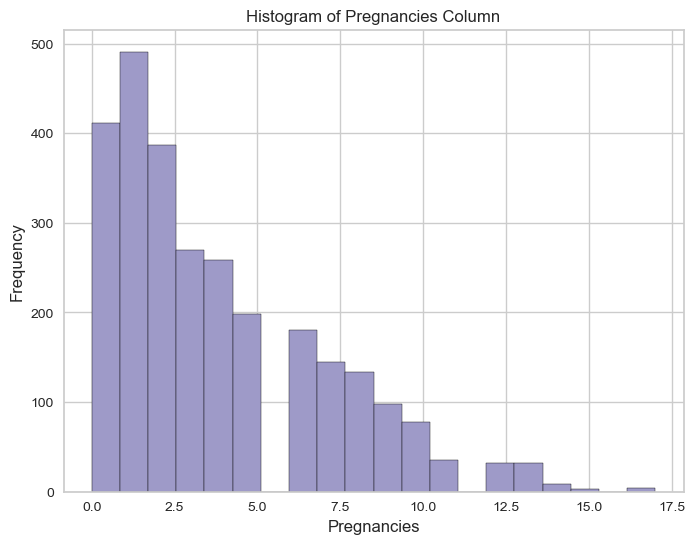

In [15]:
# Create a histogram for the 'Pregnancies' column
plt.figure(figsize=(8, 6))
plt.hist(df['Pregnancies'], bins=20, color='#9e9ac8', edgecolor='black')  # Muted pastel lavender

# Add labels and title
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Histogram of Pregnancies Column')

# Show the plot
plt.show()

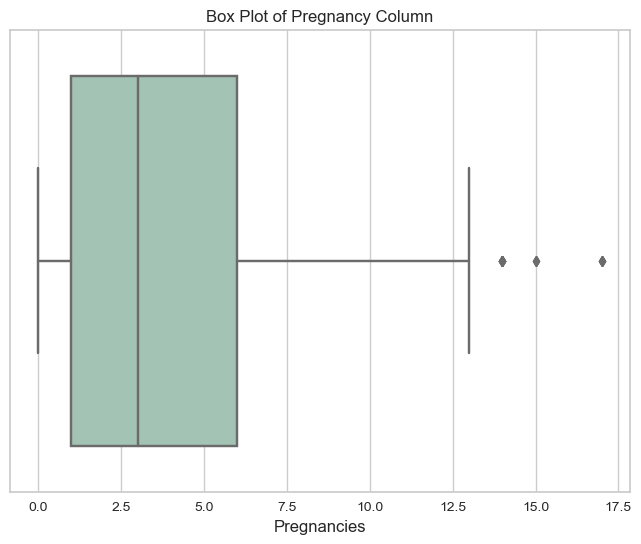

In [16]:
# Choose a muted color for the box plot
boxplot_color = '#9ec8b4'  

# Create a box plot for the 'Pregnancies' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pregnancies', data=df, color=boxplot_color)

# Show the plot
plt.title('Box Plot of Pregnancy Column')
plt.show()

# Identify and display outliers
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Pregnancies'] < lower_bound) | (df['Pregnancies'] > upper_bound)]

In [17]:
outliers_Pregnancies = pd.Series(outliers['Pregnancies'].unique()).sort_values().values
outliers_Pregnancies

array([14, 15, 17], dtype=int64)

In [18]:
# Group by 'Outcome' and calculate multiple aggregate statistics for 'Pregnancies'
result = df.groupby('Outcome')['Pregnancies'].agg(['mean', 'sum', 'count', 'min', 'max'])
result

,mean,sum,count,min,max
Outcome,,,,,
0,3.20,5819,1816,0,13
1,4.77,4541,952,0,17


##### Note: 
- 14, 15, and 17 times pregnancy seems unusual, but not impossible. Therefore, these records can be considered not outliers. 
- Histogram shows right skeweness, since number of pregnancies of higher term is less within the feature.
- For the lavel 0, max pregency number is less than the level 1.

#### B)Glucose

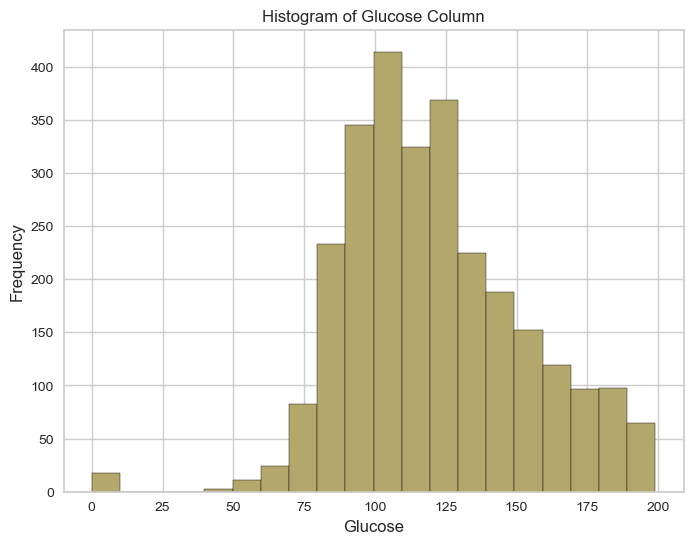

In [19]:
# Choose a muted color for the histogram
histogram_color = '#b4a76c'  

# Create a histogram for the 'Glucose' column
plt.figure(figsize=(8, 6))
plt.hist(df['Glucose'], bins=20, color=histogram_color, edgecolor='black')

# Add labels and title
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Column')

# Show the plot
plt.show()

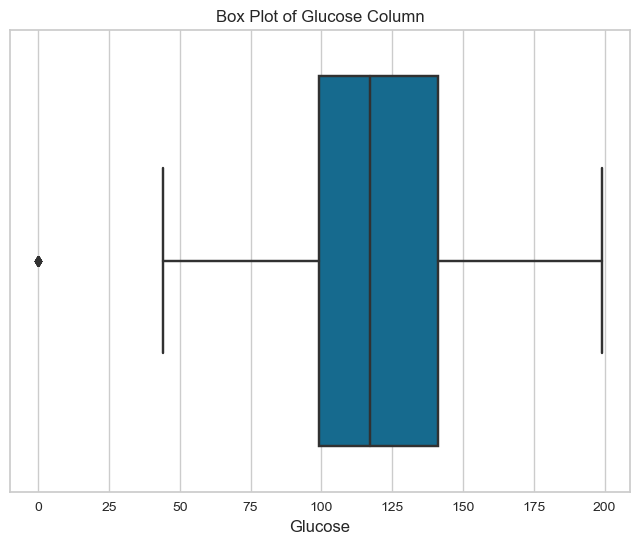

In [20]:
# Create a box plot for the 'pregnancy' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Glucose', data=df)

# Show the plot
plt.title('Box Plot of Glucose Column')
plt.show()

# Identify and display outliers
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Glucose'] < lower_bound) | (df['Glucose'] > upper_bound)]

In [21]:
print(pd.Series(outliers['Glucose'].unique()).sort_values().values, outliers.shape)

[0] (18, 9)


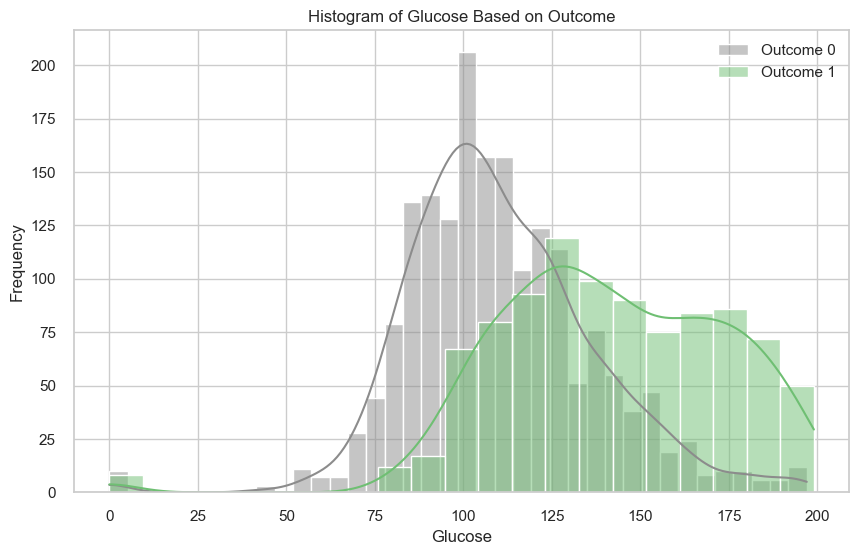

In [22]:
# Set the style for the plot 
sns.set(style="whitegrid")

# Choose alternative muted and sober colors
color_outcome_0 = '#8c8c8c'  
color_outcome_1 = '#6fbf73'  

# Create subplots based on 'Outcome'
plt.figure(figsize=(10, 6))
plt.title('Histogram of Glucose Based on Outcome')

# Histogram for Outcome = 0
sns.histplot(df[df['Outcome'] == 0]['Glucose'], label='Outcome 0', kde=True, color=color_outcome_0)

# Histogram for Outcome = 1
sns.histplot(df[df['Outcome'] == 1]['Glucose'], label='Outcome 1', kde=True, color=color_outcome_1)

# Add labels and legend
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [23]:
# Group by 'Outcome' and calculate multiple aggregate statistics for 'Glucose'
result = df.groupby('Outcome')['Glucose'].agg(['mean', 'sum', 'count', 'min', 'max'])
result

,mean,sum,count,min,max
Outcome,,,,,
0,110.42,200522,1816,0,197
1,141.48,134690,952,0,199


##### Note:
The central tendency for class 0 (mean 110) is less than the class 1 (mean 141)which indicates the higher the glucose level, the higher risk of having diabetes.

#### C) BloodPressure

In [24]:
# Count the number of records where BloodPressure is 0
num_records_blood_pressure_zero = len(df[df['BloodPressure'] == 0])

# Print or use the result
print("Number of records where BloodPressure is 0:", num_records_blood_pressure_zero)

Number of records where BloodPressure is 0: 125


In [25]:
# Calculate the 50th percentile value for BloodPressure
percentile_50 = np.percentile(df['BloodPressure'], 50)

# Replace zero values with the 50 th percentile value
df['BloodPressure'] = df['BloodPressure'].replace(0, percentile_50)



#### Note:
- A reading of blood pressure = 0 would be extremely unusual and likely indicate a critical situation. so it is replaced with the median value.

#### D) Insulin

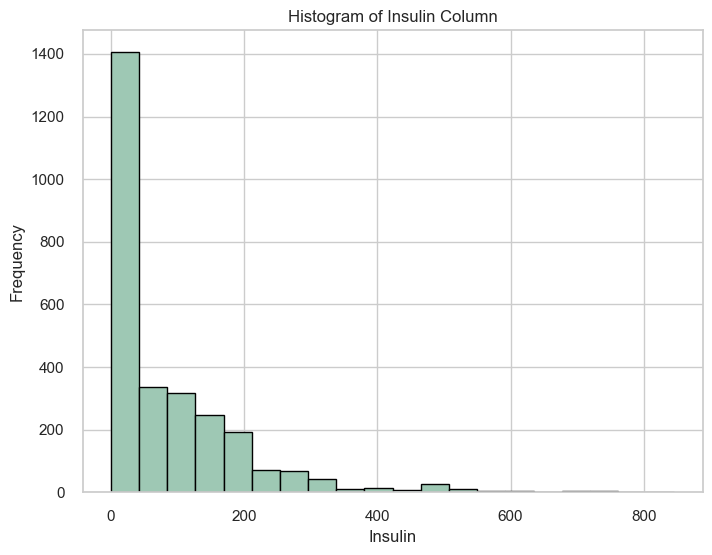

In [26]:
# Choose a muted color for the histogram
histogram_color = '#9ec8b4'  

# Create a histogram for the 'Insulin' column
plt.figure(figsize=(8, 6))
plt.hist(df['Insulin'], bins=20, color=histogram_color, edgecolor='black')

# Add labels and title
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Histogram of Insulin Column')

# Show the plot
plt.show()

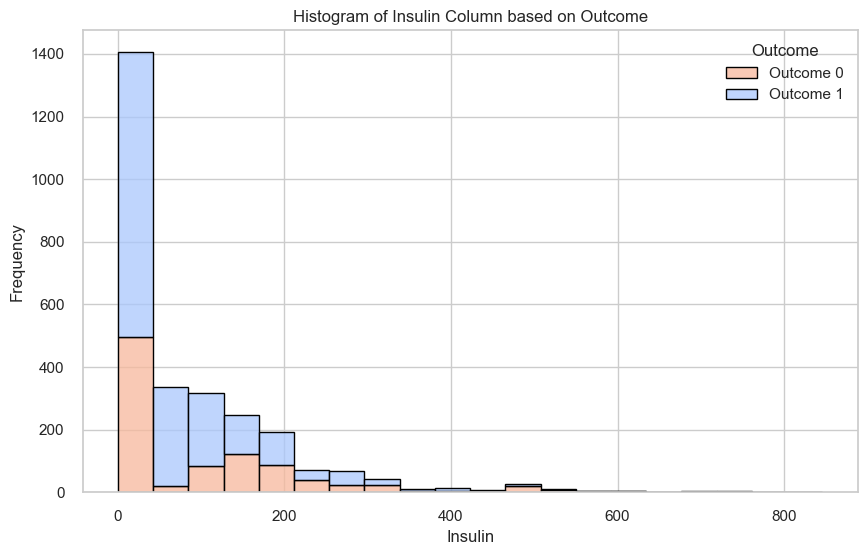

In [27]:
# Set the style for the plot 
sns.set(style="whitegrid")

# Create a grouped histogram based on 'Outcome'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Insulin', bins=20, hue='Outcome', multiple='stack', palette='coolwarm', edgecolor='black')

# Add labels and title
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Histogram of Insulin Column based on Outcome')

# Add a legend
plt.legend(title='Outcome', labels=['Outcome 0', 'Outcome 1'])

# Show the plot
plt.show()


In [28]:
# Group by 'Outcome' and calculate multiple aggregate statistics for 'Insulin'
result = df.groupby('Outcome')['Insulin'].agg(['mean', 'median','sum', 'count', 'min', 'max'])
result

,mean,median,sum,count,min,max
Outcome,,,,,,
0,70.08,42.50,127258,1816,0,744
1,99.30,0.00,94536,952,0,846


##### Note:
Diabetes is a cronic condition where the body loses its ability to produce insulin, or begins to produce or use insulin less efficiently, resulting in blood glucose levels that are too high (hyperglycaemia).Based on the histogram, we can see that central tendancy for class 0 (mean 59) is less than the class 1 (mean 130), the insulin level is higher for the class 1; however, the maximum insulin level we get for the class 1.

#### E) Age

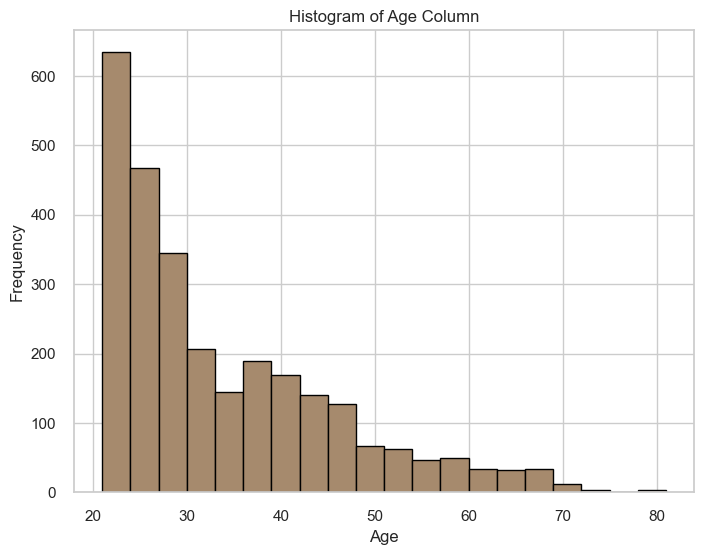

In [29]:
# Choose a different muted color for the histogram
histogram_color = '#a68a6d' 
# Create a histogram for the 'Age' column
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color=histogram_color, edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Column')

# Show the plot
plt.show()

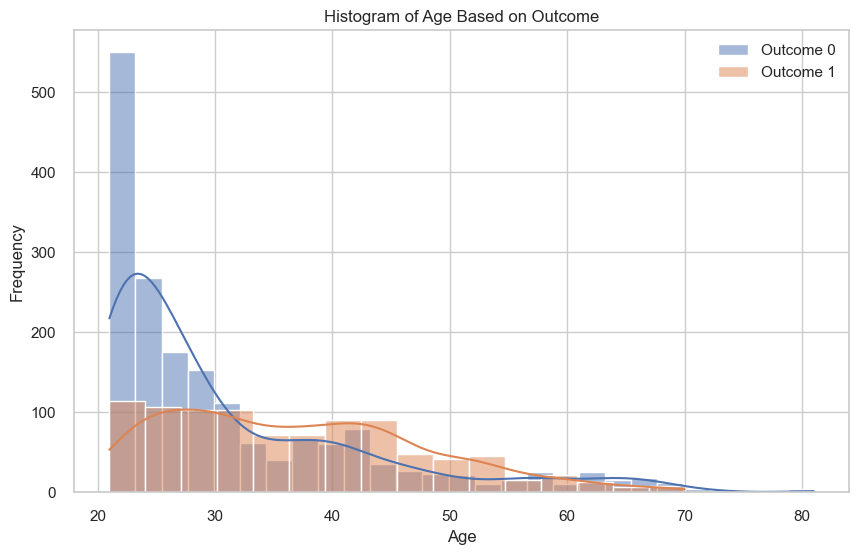

In [30]:
# Set the style for the plot 
sns.set(style="whitegrid")

# Create subplots based on 'Outcome'
plt.figure(figsize=(10, 6))
plt.title('Histogram of Age Based on Outcome')

# Histogram for Outcome = 0
sns.histplot(df[df['Outcome'] == 0]['Age'], label='Outcome 0', kde=True)

# Histogram for Outcome = 1
sns.histplot(df[df['Outcome'] == 1]['Age'], label='Outcome 1', kde=True)

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [31]:
# Group by 'Outcome' and calculate multiple aggregate statistics for 'Age'
result = df.groupby('Outcome')['Age'].agg(['mean', 'median','sum', 'count', 'min', 'max'])
result

,mean,median,sum,count,min,max
Outcome,,,,,,
0,31.11,26.00,56498,1816,21,81
1,36.99,36.00,35212,952,21,70


##### Note:
Based on the histogram, we can see that central tendancy for class 0 (mean 30) is less than the class 1 (mean 38), diabetes is higher at older age people.

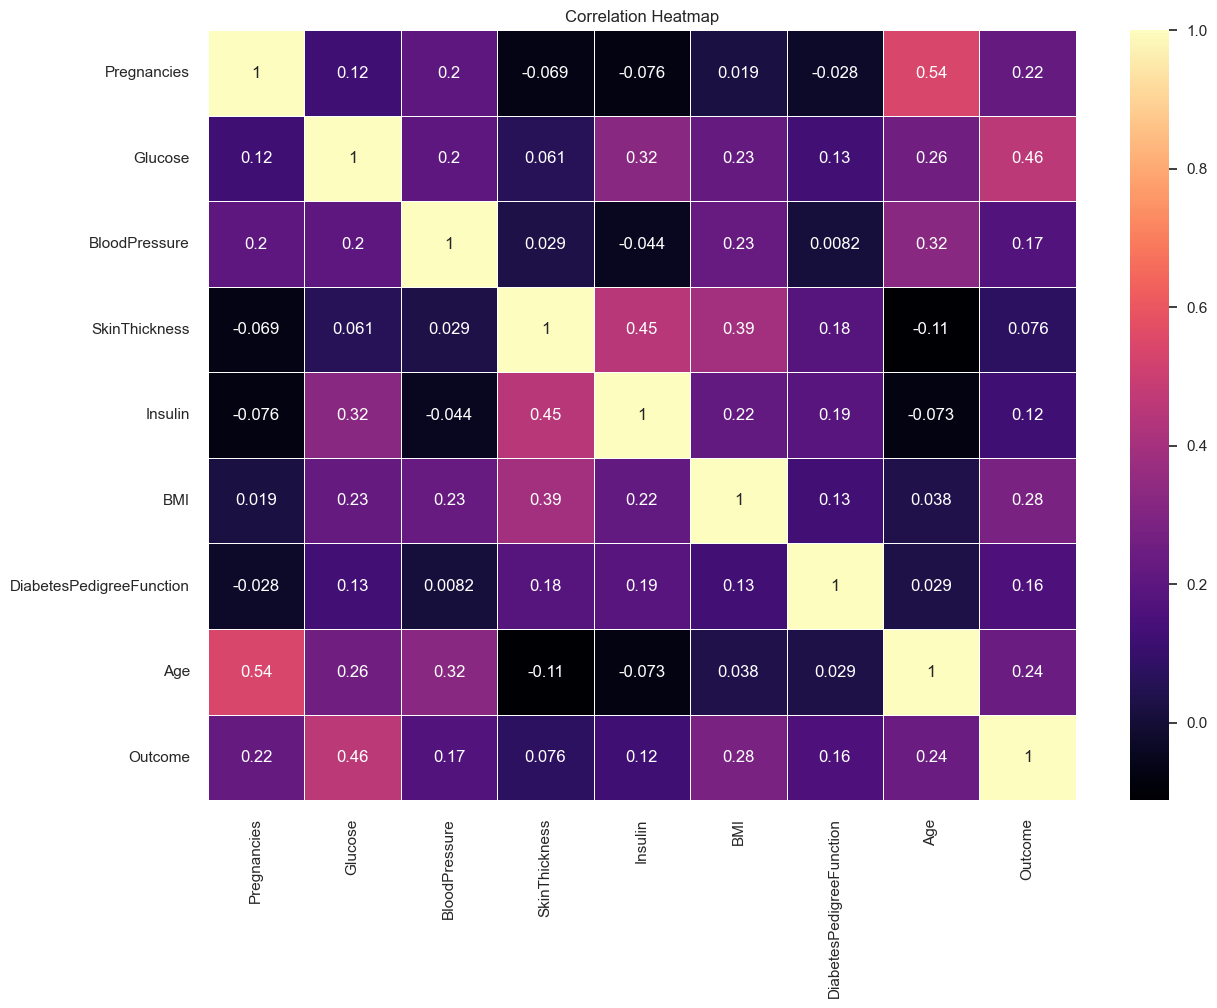

In [32]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using the 'magma' colormap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Note:
Feature Correlation Insights:

1) The analysis of feature correlations in the diabetes dataset revealed a strong positive correlation (0.81) between 'Glucose' levels and the likelihood of diabetes, underscoring its predictive significance. Conversely, the 'DiabetesPedigreeFunction' demonstrated a modest positive correlation (0.17). 
2) Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present. Here, internal feature correlations ranged from -0.051 to 0.58, indicating no potential multicollinearity concerns.

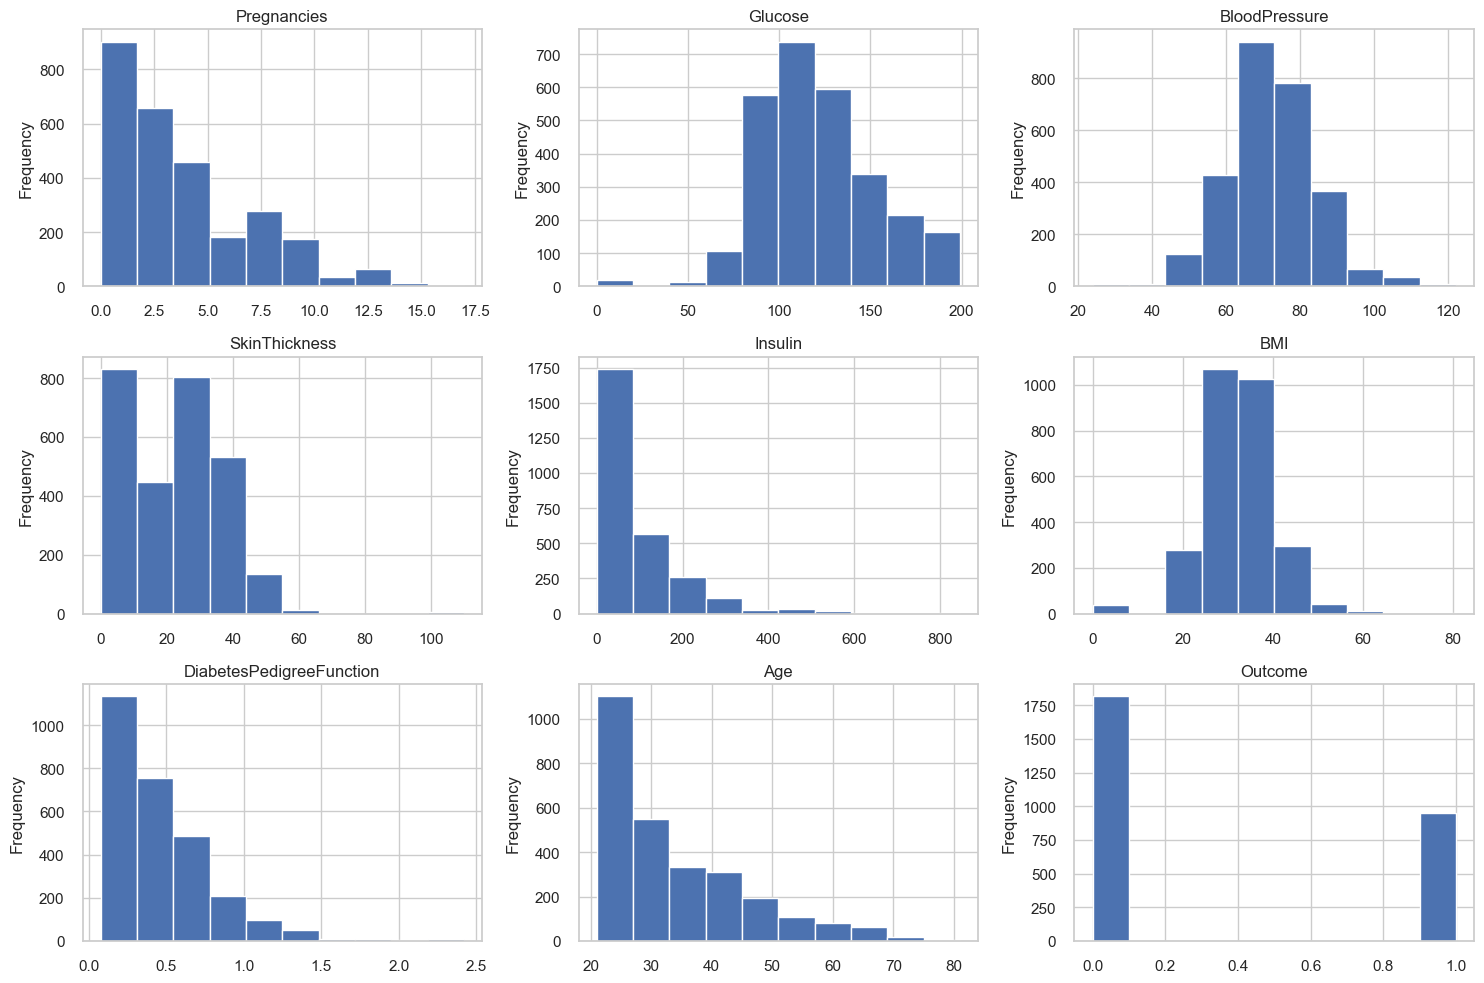

In [33]:
# Recheck the distribution after preprocessing the data and Plot histograms in subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(df.columns):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    df[column].plot(kind='hist', ax=axes[row, col], title=column)

plt.tight_layout()
plt.show()

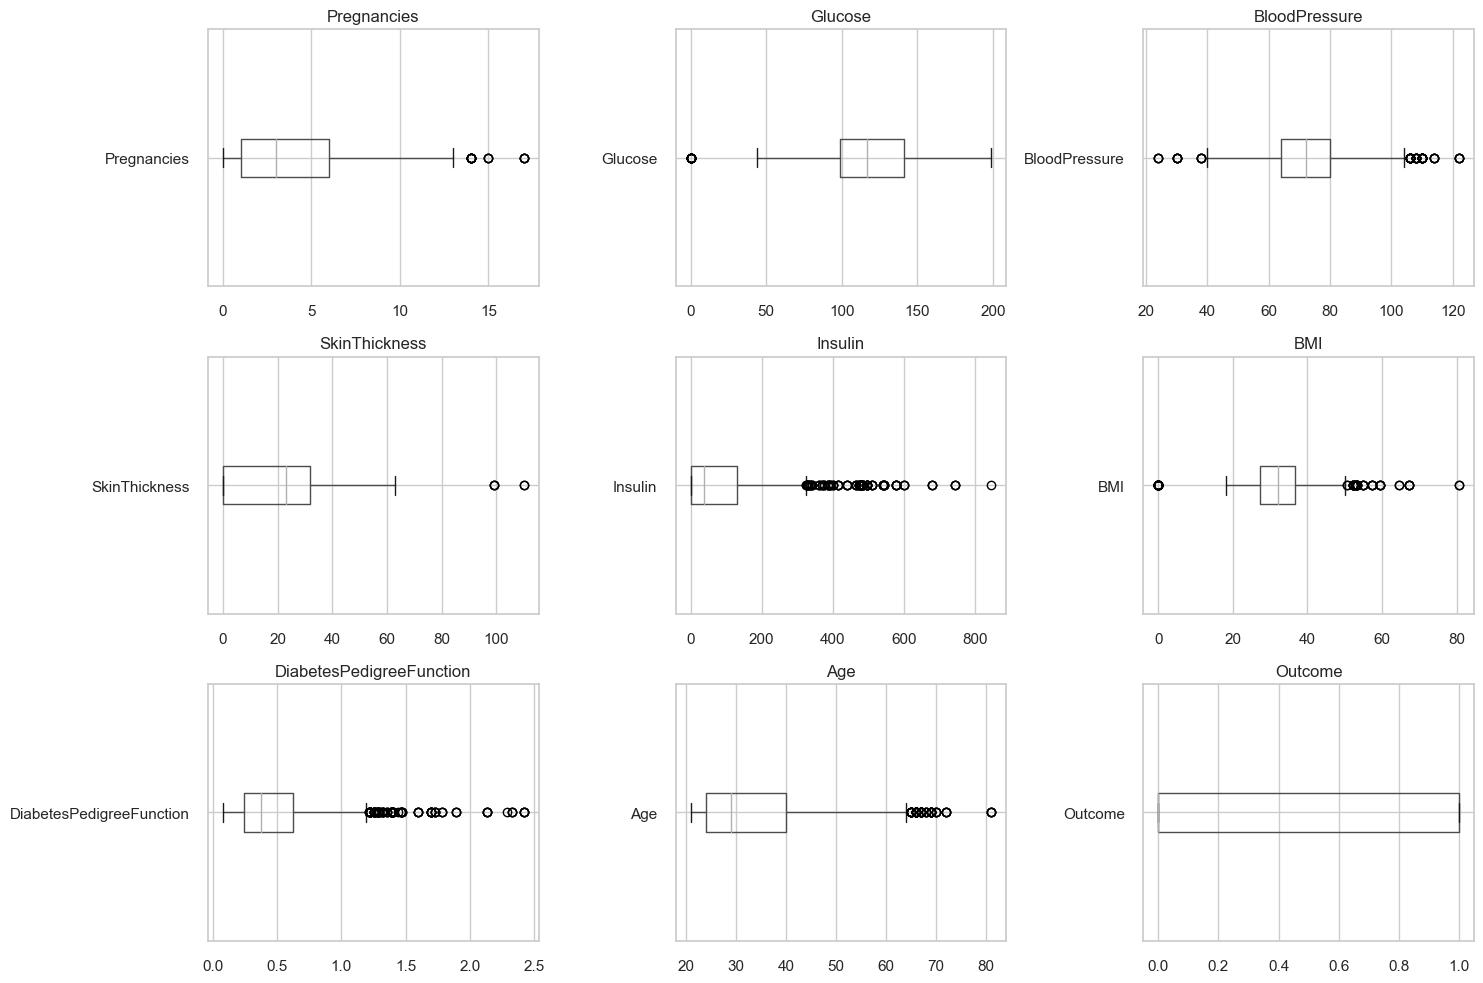

In [34]:
# Plot box plots in subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(df.columns):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    df.boxplot(column=column, ax=axes[row, col], vert=False)
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

### III) Feature engineering

#### A) BMI

In [35]:
df["BMI_category"] = ""

# Define BMI ranges and corresponding categories
bmi_ranges = [18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
category_labels = ["Underweight", "Normal", "Overweight", "Moderate obesity", "Severe obesity", "Morbid obesity"]

# Iterate over the ranges and assign categories
for i in range(len(bmi_ranges) - 1):
    mask = (df["BMI"] > bmi_ranges[i]) & (df["BMI"] <= bmi_ranges[i + 1])
    df.loc[mask, "BMI_category"] = category_labels[i]

# For BMI values greater than 39.9
df.loc[df["BMI"] > 39.9, "BMI_category"] = category_labels[-1]

# Convert "BMI_category" to category type
df["BMI_category"] = pd.Categorical(df["BMI_category"], categories=category_labels, ordered=True)

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_category
0,6,148,72,35,0,33.60,0.63,50,1,Overweight
1,1,85,66,29,0,26.60,0.35,31,0,Normal
2,8,183,64,0,0,23.30,0.67,32,1,Underweight
3,1,89,66,23,94,28.10,0.17,21,0,Normal
4,0,137,40,35,168,43.10,2.29,33,1,Morbid obesity


##### Note:
According to a ranges of BMI, BMI values are categorized into different category: "Underweight", "Normal", "Overweight", "Moderate obesity", "Severe obesity", "Morbid obesity".

### B) Insulin

In [37]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"     

In [38]:
df["Insulin_category"] = df.apply(set_insulin, axis=1)

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_category,Insulin_category
0,6,148,72,35,0,33.60,0.63,50,1,Overweight,Abnormal
1,1,85,66,29,0,26.60,0.35,31,0,Normal,Abnormal
2,8,183,64,0,0,23.30,0.67,32,1,Underweight,Abnormal
3,1,89,66,23,94,28.10,0.17,21,0,Normal,Normal
4,0,137,40,35,168,43.10,2.29,33,1,Morbid obesity,Abnormal


##### Note:
The Insulin feature is categorized into two categorey: Normal and Abnormal based on medical reference values.

### C) Glucose

In [40]:
# Example for categorizing glucose levels
df['Glucose_category'] = pd.cut(df['Glucose'], bins=[0, 70, 100, 126, float('inf')], labels=['Hypoglycemic', 'Normal', 'Prediabetic', 'Diabetic'])

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_category,Insulin_category,Glucose_category
0,6,148,72,35,0,33.60,0.63,50,1,Overweight,Abnormal,Diabetic
1,1,85,66,29,0,26.60,0.35,31,0,Normal,Abnormal,Normal
2,8,183,64,0,0,23.30,0.67,32,1,Underweight,Abnormal,Diabetic
3,1,89,66,23,94,28.10,0.17,21,0,Normal,Normal,Normal
4,0,137,40,35,168,43.10,2.29,33,1,Morbid obesity,Abnormal,Diabetic


##### Note:
The glucose is categorized into several category: 'Hypoglycemic', 'Normal', 'Prediabetic', 'Diabetic'.

### IV) Data Preparation

##### Step 1: Getting rid of unnecesary columns

In [42]:
# Create a list of columns to be deleted
columns_to_delete = ['Glucose', 'Insulin', 'BMI']

# Delete the specified columns from the dataframe
df = df.drop(columns=columns_to_delete)
df.head()

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,BMI_category,Insulin_category,Glucose_category
0,6,72,35,0.63,50,1,Overweight,Abnormal,Diabetic
1,1,66,29,0.35,31,0,Normal,Abnormal,Normal
2,8,64,0,0.67,32,1,Underweight,Abnormal,Diabetic
3,1,66,23,0.17,21,0,Normal,Normal,Normal
4,0,40,35,2.29,33,1,Morbid obesity,Abnormal,Diabetic


##### Step 2: Perform one-hot encoding for categorical columns

In [43]:
# Perform one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['BMI_category', 'Insulin_category', 'Glucose_category'], prefix=['BMI', 'Insulin', 'Glucose'])
df.head()

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,BMI_Underweight,BMI_Normal,BMI_Overweight,BMI_Moderate obesity,BMI_Severe obesity,BMI_Morbid obesity,Insulin_Abnormal,Insulin_Normal,Glucose_Hypoglycemic,Glucose_Normal,Glucose_Prediabetic,Glucose_Diabetic
0,6,72,35,0.63,50,1,0,0,1,0,0,0,1,0,0,0,0,1
1,1,66,29,0.35,31,0,0,1,0,0,0,0,1,0,0,1,0,0
2,8,64,0,0.67,32,1,1,0,0,0,0,0,1,0,0,0,0,1
3,1,66,23,0.17,21,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,40,35,2.29,33,1,0,0,0,0,0,1,1,0,0,0,0,1


In [44]:
# Move the outcome column at the end
df = df[[col for col in df.columns if col != 'Outcome'] + ['Outcome']]
df.head()

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,BMI_Underweight,BMI_Normal,BMI_Overweight,BMI_Moderate obesity,BMI_Severe obesity,BMI_Morbid obesity,Insulin_Abnormal,Insulin_Normal,Glucose_Hypoglycemic,Glucose_Normal,Glucose_Prediabetic,Glucose_Diabetic,Outcome
0,6,72,35,0.63,50,0,0,1,0,0,0,1,0,0,0,0,1,1
1,1,66,29,0.35,31,0,1,0,0,0,0,1,0,0,1,0,0,0
2,8,64,0,0.67,32,1,0,0,0,0,0,1,0,0,0,0,1,1
3,1,66,23,0.17,21,0,1,0,0,0,0,0,1,0,1,0,0,0
4,0,40,35,2.29,33,0,0,0,0,0,1,1,0,0,0,0,1,1


##### Step3: Fixing the Class Imbalance implementing SMOTE algorithm

In [46]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [47]:
# Initialize SMOTE algorithm
smote = SMOTE(random_state=42)

# Apply SMOTE to create synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced dataframe
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Outcome')], axis=1)


In [48]:
# Checking the datashape after resampling
df_resampled.shape

(3632, 18)

Previously was (2768, 9)

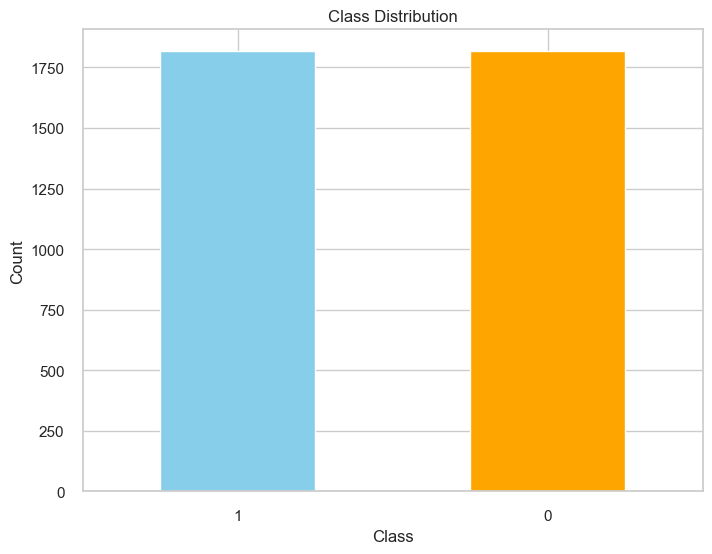

In [49]:
# Check again the class distribution after resampling
class_distribution = df_resampled['Outcome'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### Step4: Divide the dataset into Train and Test Set

In [50]:
# Shuffle the data
shuffled_df = shuffle(df_resampled, random_state=42)

In [51]:
# Separate features (X) and target variable (y)
X = shuffled_df.drop('Outcome', axis=1)
y = shuffled_df['Outcome']


In [52]:
# Split the data into training and testing sets with 5% as unseen for final evaluation. 
# Also stratify the dataset to keep the distribution of classes equally in train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)

In [53]:
len(X_train)

3450

In [54]:
len(X_test)

182

In [55]:
# Transforming data -To scale the training set and the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-1.16613608, -0.25888702,  0.34675527, ...,  1.98206242,
        -0.66098509, -0.86061954],
       [-0.28341038,  0.50916591, -1.29526868, ..., -0.50452498,
        -0.66098509, -0.86061954],
       [-0.57765228, -0.08820859, -0.26140175, ..., -0.50452498,
        -0.66098509,  1.16195363],
       ...,
       [ 0.89355721,  0.93586198, -1.29526868, ..., -0.50452498,
        -0.66098509,  1.16195363],
       [ 2.36476669,  0.93586198,  0.71164948, ...,  1.98206242,
        -0.66098509, -0.86061954],
       [ 0.01083151,  0.76518355,  0.65083378, ..., -0.50452498,
        -0.66098509,  1.16195363]])

### V) Training Models

##### Step1: Defining a list of classifiers

In [56]:
# Create a list of classifiers
classifiers = [
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    LogisticRegression(),
    SVC(probability=True)
]

##### Step2: Cross validation, k = 5

In [57]:
# Assuming X_train and y_train are pandas DataFrames/Series
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

##### Step3: Train the classifier using a for loop, predict on validation dataset, and evaluate their performances using evaluation metrics: Accuracy, Area Under Curve, Recall, Precision, F1 score, and Confusion matrix.

In [58]:
# List to store trained models
trained_models = []

# Dictionary to store models and their metrics
models_metrics_dict = {}

# Loop through each classifier and perform 5-fold cross-validation
for clf in classifiers:
    accuracy_list = []
    auc_list = []
    recall_list = []
    precision_list = []
    f1_list = []

    for train_index, val_index in kf.split(X_train, y_train):
        X_train_fold, X_val_fold = pd.DataFrame(X_train).iloc[train_index], pd.DataFrame(X_train).iloc[val_index]
        y_train_fold, y_val_fold = pd.Series(y_train).iloc[train_index], pd.Series(y_train).iloc[val_index]

        clf.fit(X_train_fold, y_train_fold)
        y_pred_fold = clf.predict(X_val_fold)

        accuracy_list.append(accuracy_score(y_val_fold, y_pred_fold))
        auc_list.append(roc_auc_score(y_val_fold, y_pred_fold))
        recall_list.append(recall_score(y_val_fold, y_pred_fold))
        precision_list.append(precision_score(y_val_fold, y_pred_fold))
        f1_list.append(f1_score(y_val_fold, y_pred_fold))

    # Calculate mean metrics across folds
    mean_accuracy = np.mean(accuracy_list)
    mean_auc = np.mean(auc_list)
    mean_recall = np.mean(recall_list)
    mean_precision = np.mean(precision_list)
    mean_f1 = np.mean(f1_list)

    # Store the trained model in the list
    trained_models.append(clf)

    # Store metrics in a dictionary
    metrics_dict = {
        'Mean Accuracy': mean_accuracy,
        'Mean AUC': mean_auc,
        'Mean Recall': mean_recall,
        'Mean Precision': mean_precision,
        'Mean F1 Score': mean_f1,
    }

    # Store the model and its metrics in the dictionary
    models_metrics_dict[clf.__class__.__name__] = {
        'Model': clf,
        'Metrics': metrics_dict,
    }



In [59]:
# Create a DataFrame to store the mean metrics for each model
metrics_df = pd.DataFrame(columns=['Model', 'Mean Accuracy', 'Mean Recall', 'Mean Precision', 'Mean F1 Score'])

# Populate the DataFrame with model metrics
for model_name, model_info in models_metrics_dict.items():
    metrics_dict = model_info['Metrics']
    metrics_dict['Model'] = model_name
    metrics_df = metrics_df.append(metrics_dict, ignore_index=True)

# Display the DataFrame
metrics_df

,Model,Mean Accuracy,Mean Recall,Mean Precision,Mean F1 Score,Mean AUC
0,KNeighborsClassifier,0.89,0.93,0.86,0.90,0.89
1,GaussianNB,0.65,0.97,0.59,0.73,0.65
2,DecisionTreeClassifier,0.99,0.98,0.99,0.99,0.99
3,RandomForestClassifier,0.99,0.99,0.99,0.99,0.99
4,AdaBoostClassifier,0.81,0.82,0.79,0.81,0.81
5,GradientBoostingClassifier,0.87,0.92,0.84,0.88,0.87
6,ExtraTreesClassifier,0.99,0.99,0.99,0.99,0.99
7,XGBClassifier,0.99,0.99,0.99,0.99,0.99
8,LGBMClassifier,0.98,0.99,0.98,0.99,0.98
9,LogisticRegression,0.76,0.77,0.76,0.76,0.76


In [60]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc_value = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_value))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()



KNeighborsClassifier:


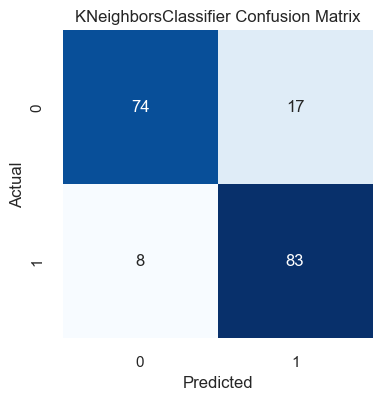

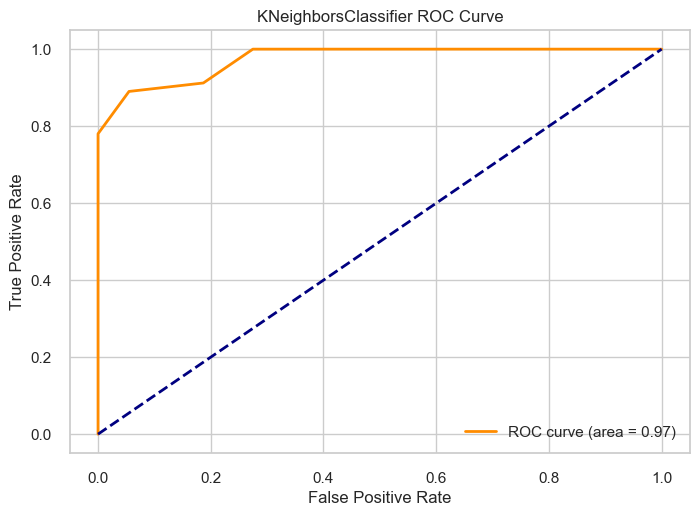



GaussianNB:


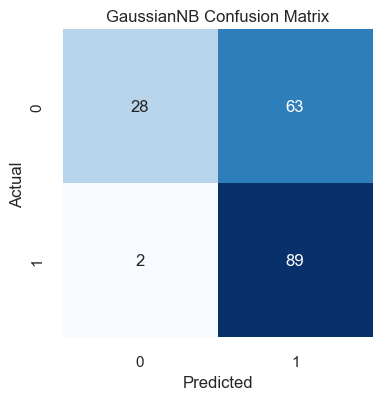

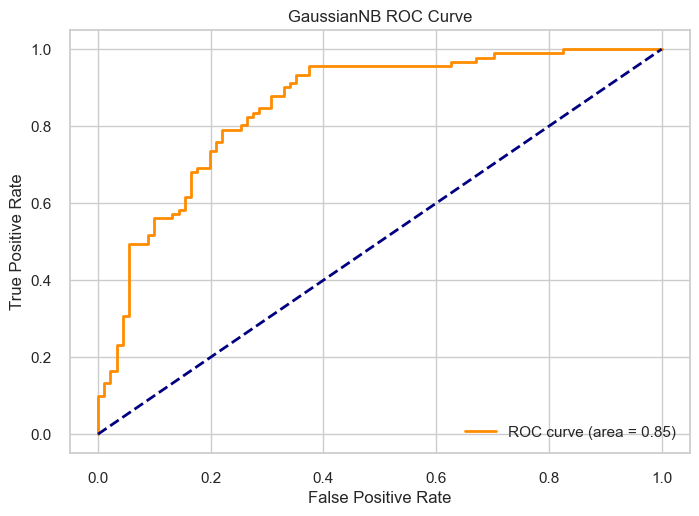



DecisionTreeClassifier:


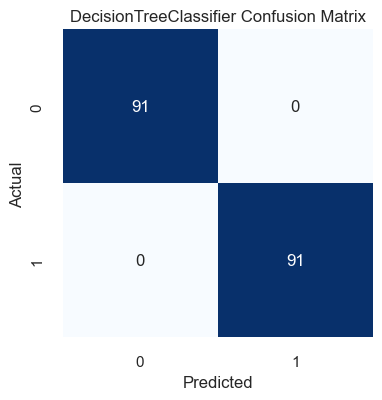

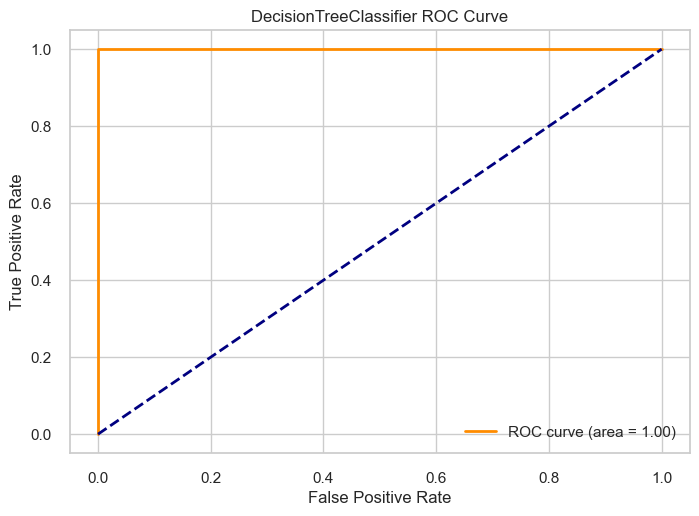



RandomForestClassifier:


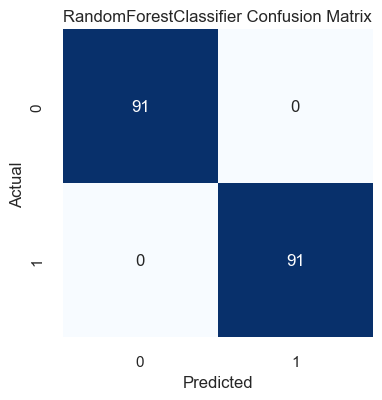

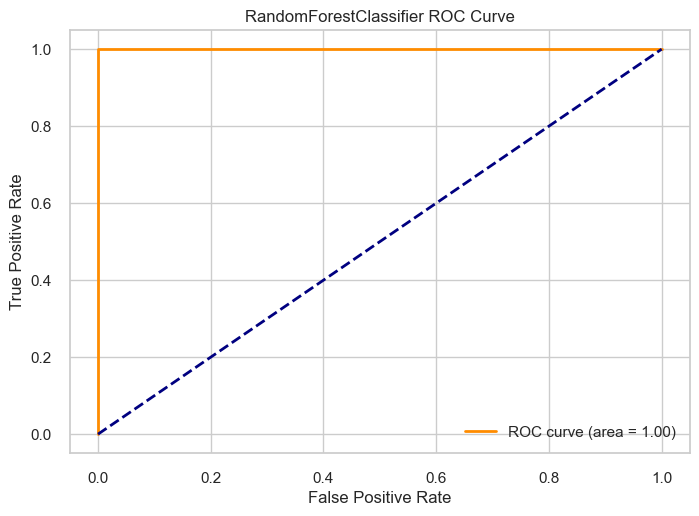



AdaBoostClassifier:


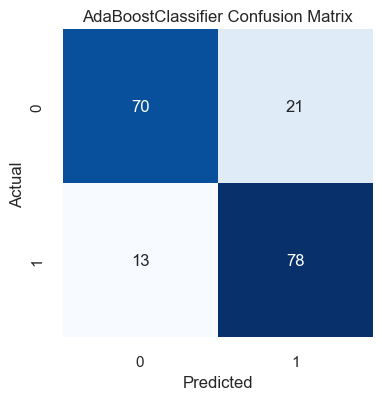

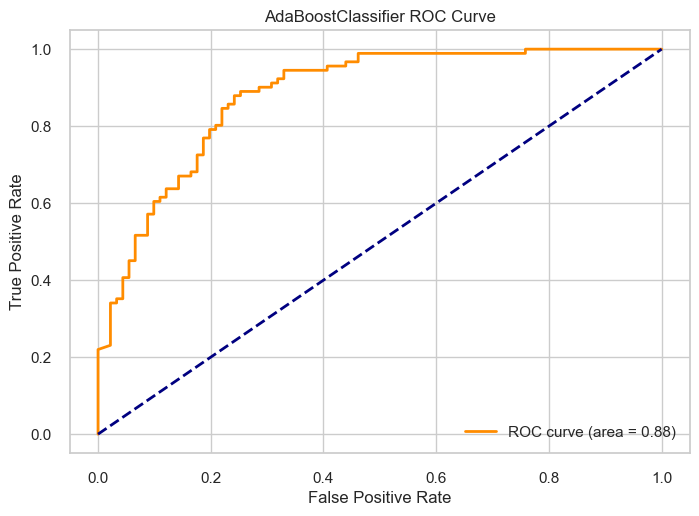



GradientBoostingClassifier:


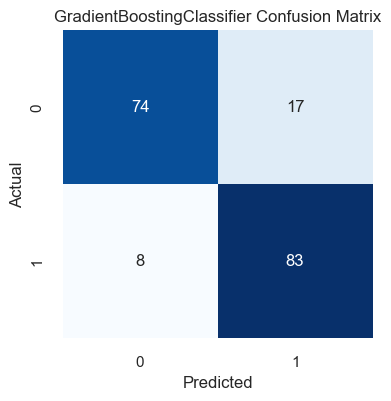

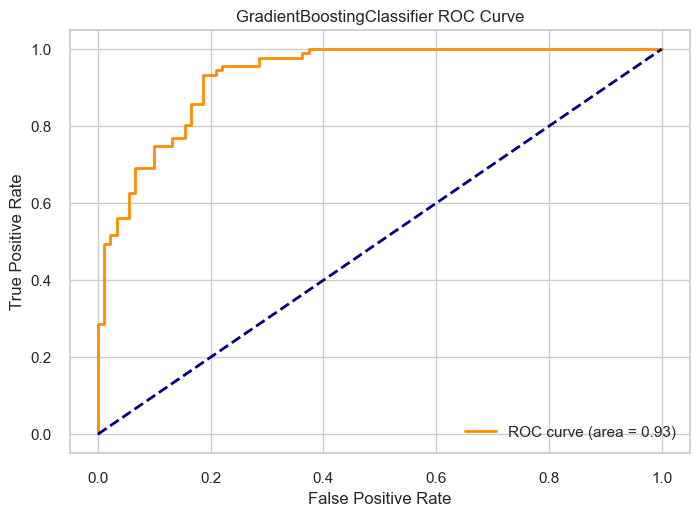



ExtraTreesClassifier:


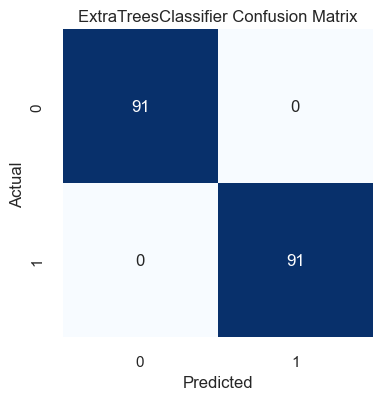

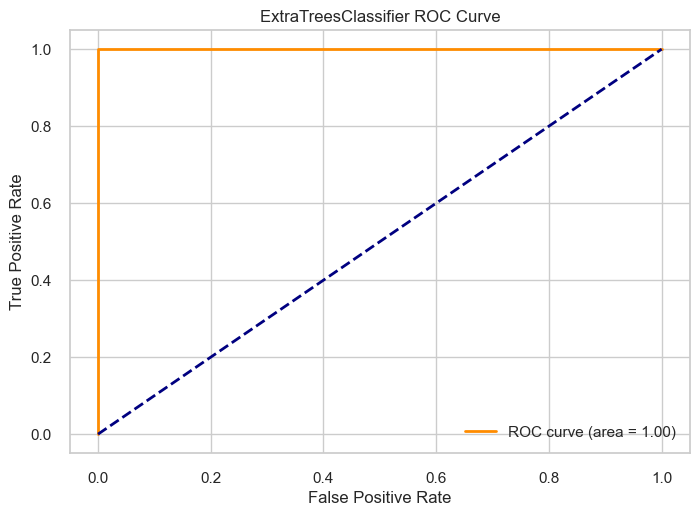



XGBClassifier:


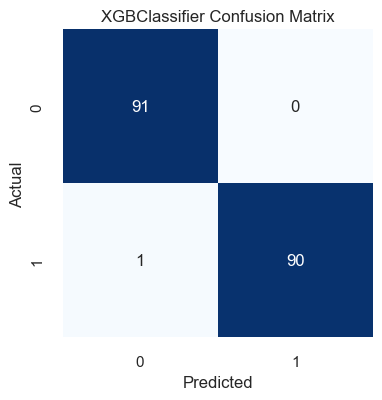

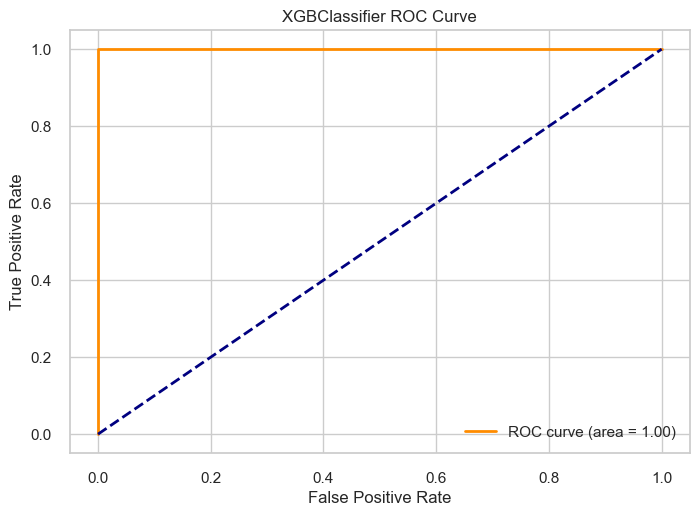



LGBMClassifier:


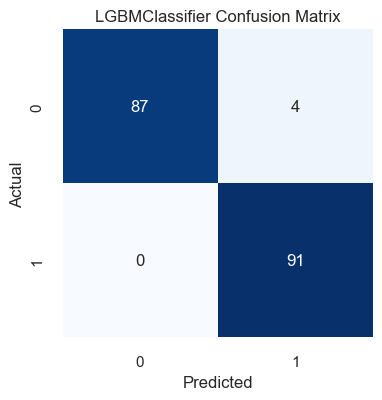

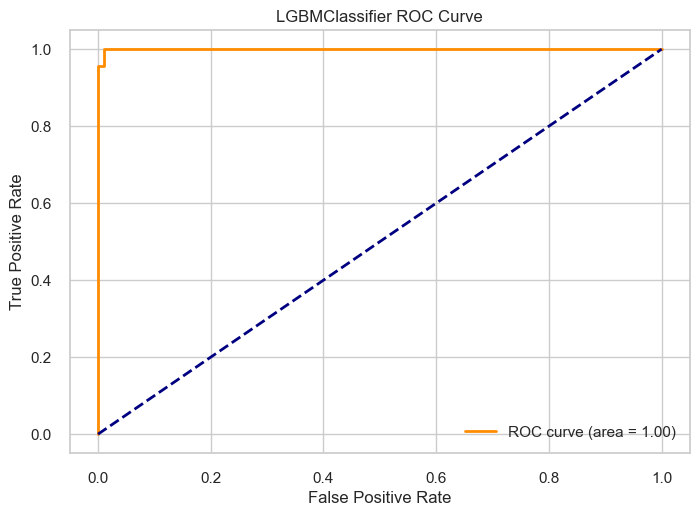



LogisticRegression:


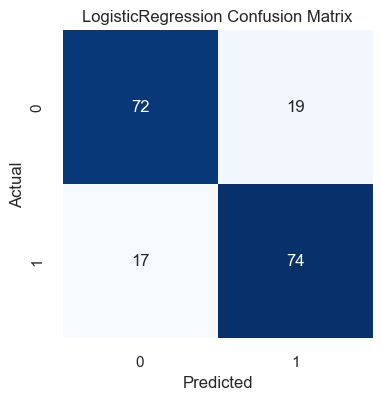

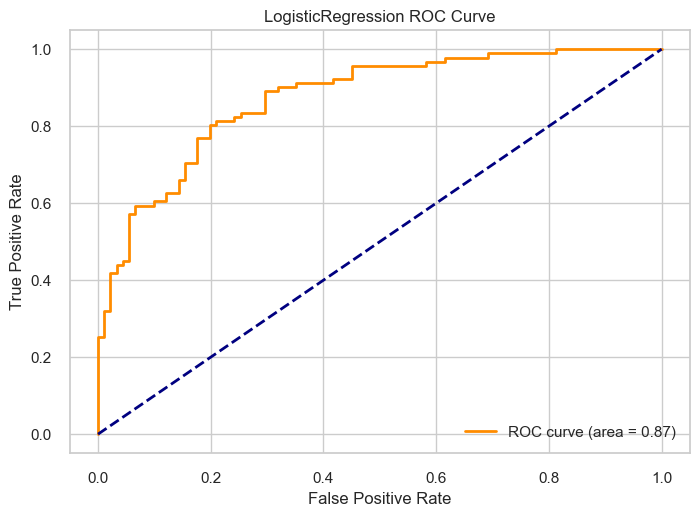



SVC:


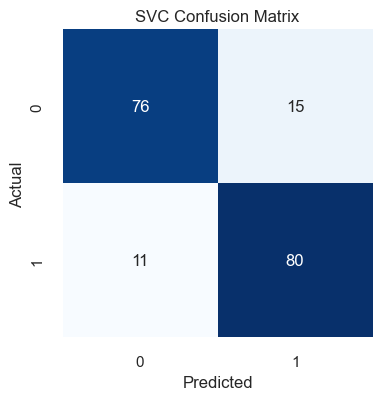

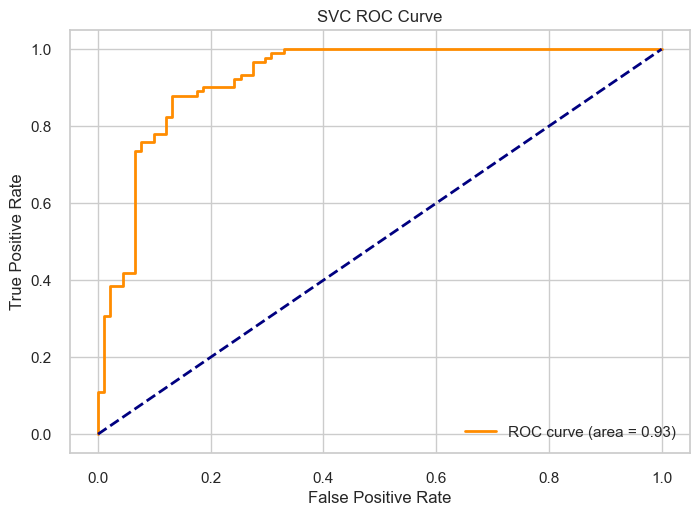

In [61]:
# Plot confusion matrix and ROC curve for each model
for model_name, model_info in models_metrics_dict.items():
    print(f"{model_name}:")

    # Plot confusion matrix
    model = model_info['Model']
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)

    # Plot ROC curve
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, y_probs, model_name)
    else:
        print(f"  {model_name} does not support probability prediction, so ROC curve won't be plotted.")

    print("\n")

In [62]:
trained_models 

[KNeighborsClassifier(),
 GaussianNB(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 ExtraTreesClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 LGBMClassifier(),
 LogisticRegression(),
 SVC(probability=True

In [4]:
# Select the relevant columns
columns_of_interest = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC']

# Find the model with the maximum value in each column along with the maximum value
max_model_dict = {}
for column in columns_of_interest:
    max_value = df1[column].max()
    max_model_index = df1[column].idxmax()
    max_model = df1.loc[max_model_index, 'Model']
    max_model_dict[column] = {'Train': max_model, 'Max Train Score': max_value}

# Convert the dictionary to a DataFrame
max_model_df1 = pd.DataFrame(max_model_dict).T.reset_index().rename(columns={'index': 'Metric'})
max_model_df1

,Metric,Train,Max Train Score
0,Accuracy,DecisionTreeClassifier,0.99
1,Recall,RandomForestClassifier,0.99
2,Precision,DecisionTreeClassifier,0.99
3,F1 Score,DecisionTreeClassifier,0.99
4,AUC,DecisionTreeClassifier,0.99


##### Note:
- Total 11 classifiers were trained.
- All the classifiers were cross validated and their evaluation metrices were claculated.
- Except Recall, for all evaluation metrices DecisionTreeClassifier showed maximum score(0.99).
- RandomForestClassifier performance on Recall is 0.99.
- So the best model in training is DecisionTreeClassifier.

### VI) Test Models

##### Step1: Test the model's perfromance on unseen data

KNeighborsClassifier Metrics on Test Set:
  Accuracy: 0.8626373626373627
  AUC: 0.97403695205893
  Recall: 0.9120879120879121
  Precision: 0.83
  F1 Score: 0.869109947643979


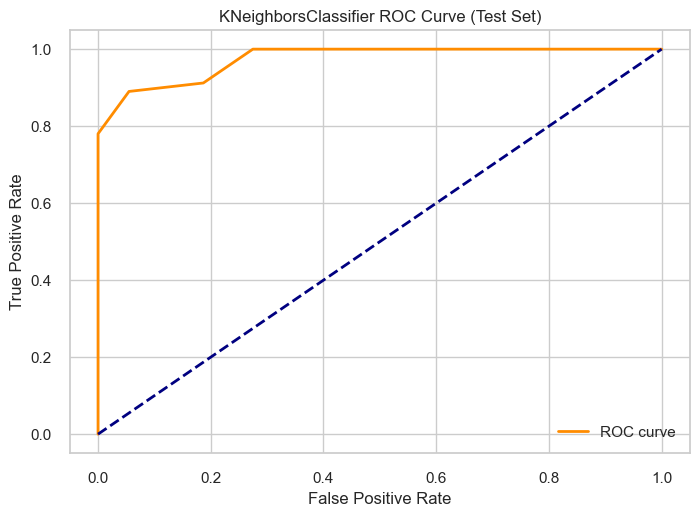

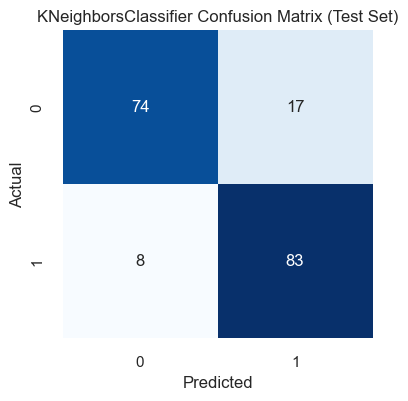



GaussianNB Metrics on Test Set:
  Accuracy: 0.6428571428571429
  AUC: 0.8525540393672262
  Recall: 0.978021978021978
  Precision: 0.5855263157894737
  F1 Score: 0.7325102880658436


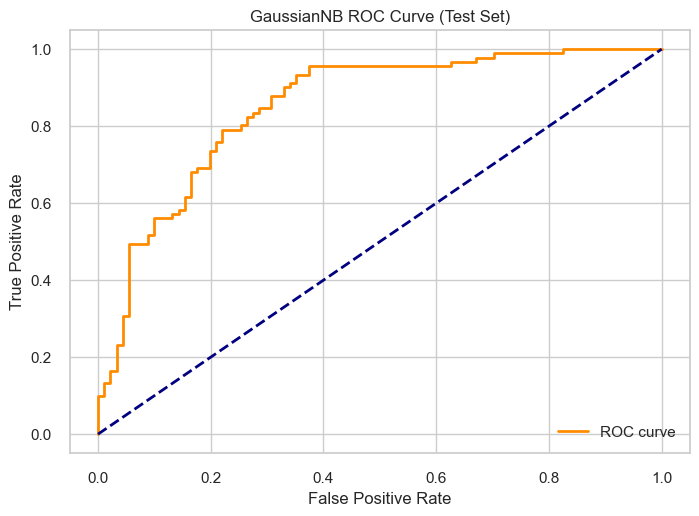

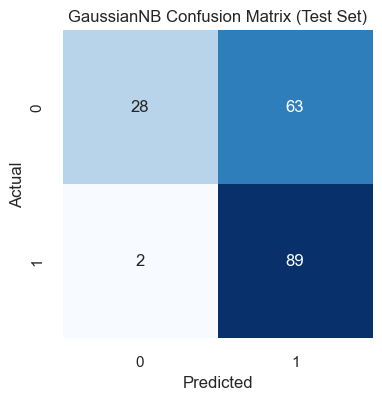



DecisionTreeClassifier Metrics on Test Set:
  Accuracy: 1.0
  AUC: 1.0
  Recall: 1.0
  Precision: 1.0
  F1 Score: 1.0


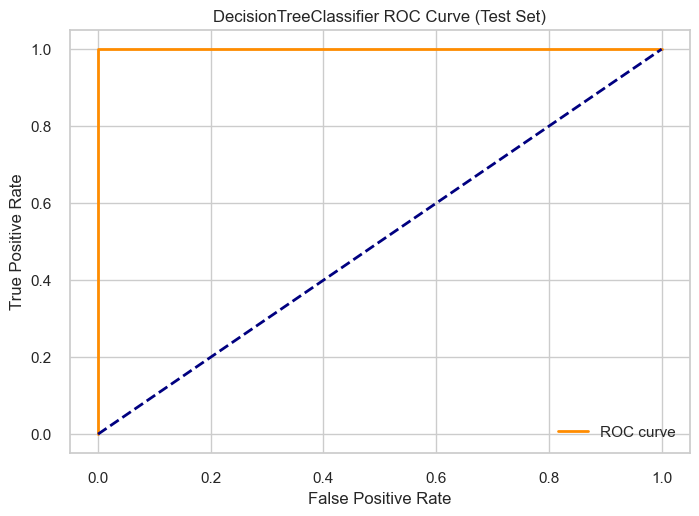

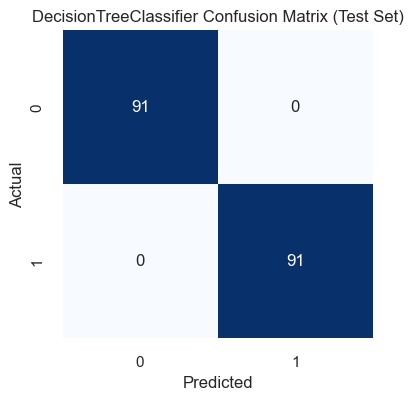

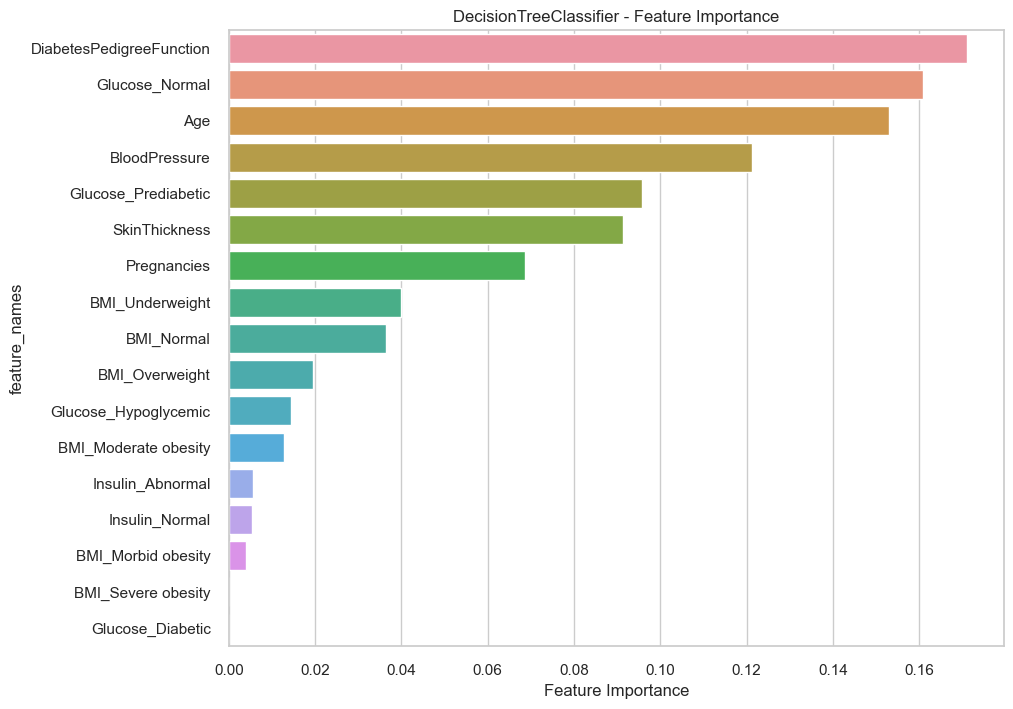



RandomForestClassifier Metrics on Test Set:
  Accuracy: 1.0
  AUC: 1.0
  Recall: 1.0
  Precision: 1.0
  F1 Score: 1.0


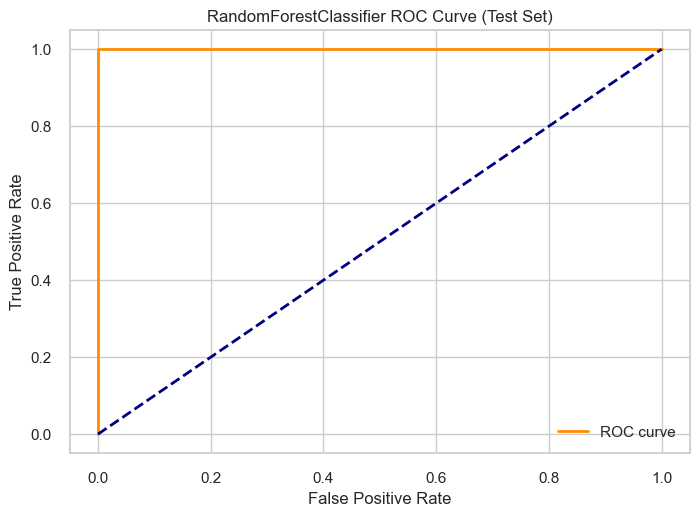

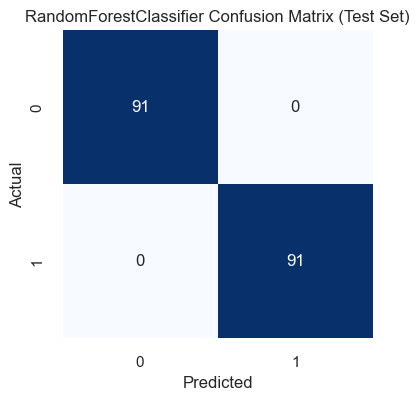

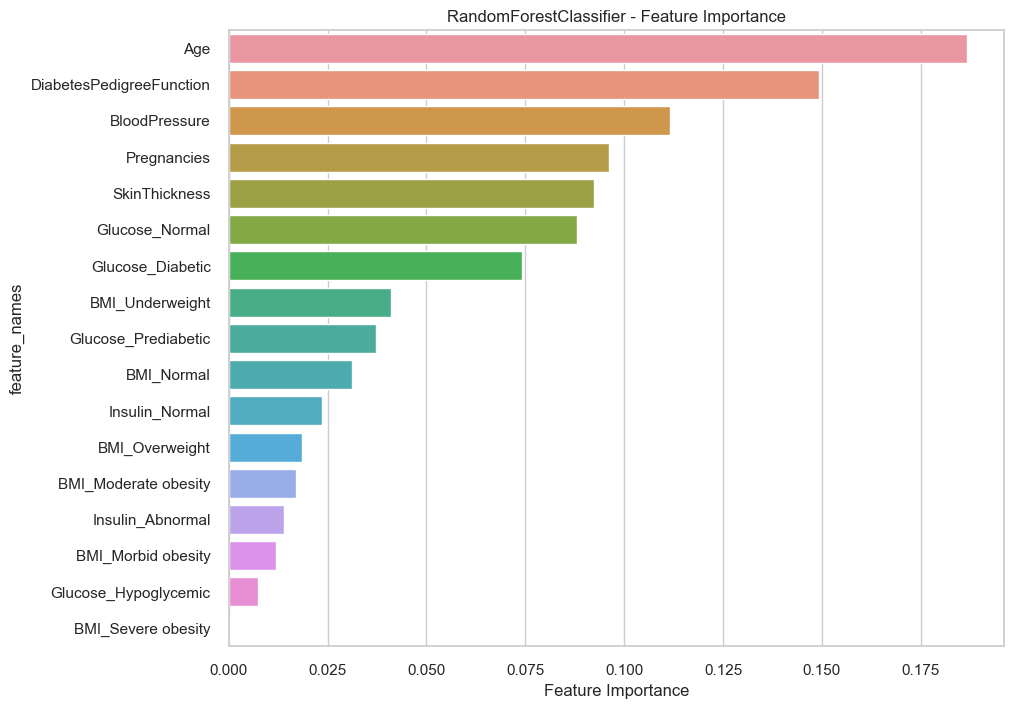



AdaBoostClassifier Metrics on Test Set:
  Accuracy: 0.8131868131868132
  AUC: 0.8815360463712112
  Recall: 0.8571428571428571
  Precision: 0.7878787878787878
  F1 Score: 0.8210526315789474


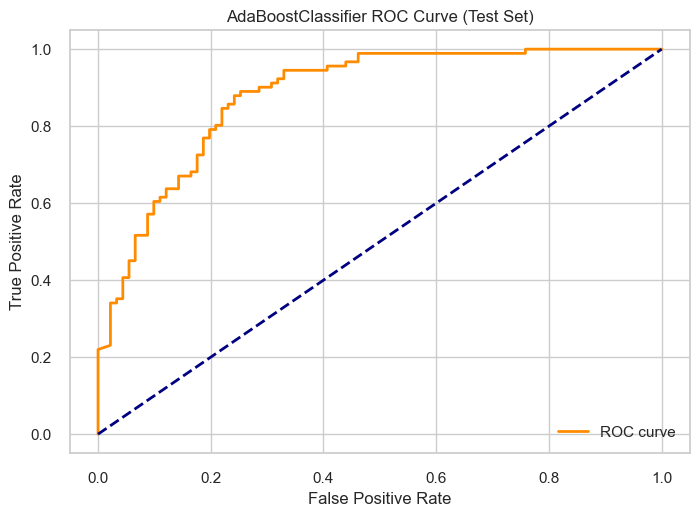

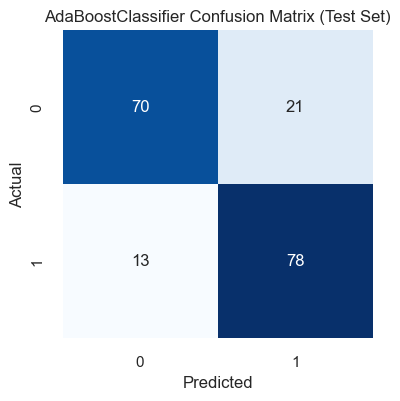

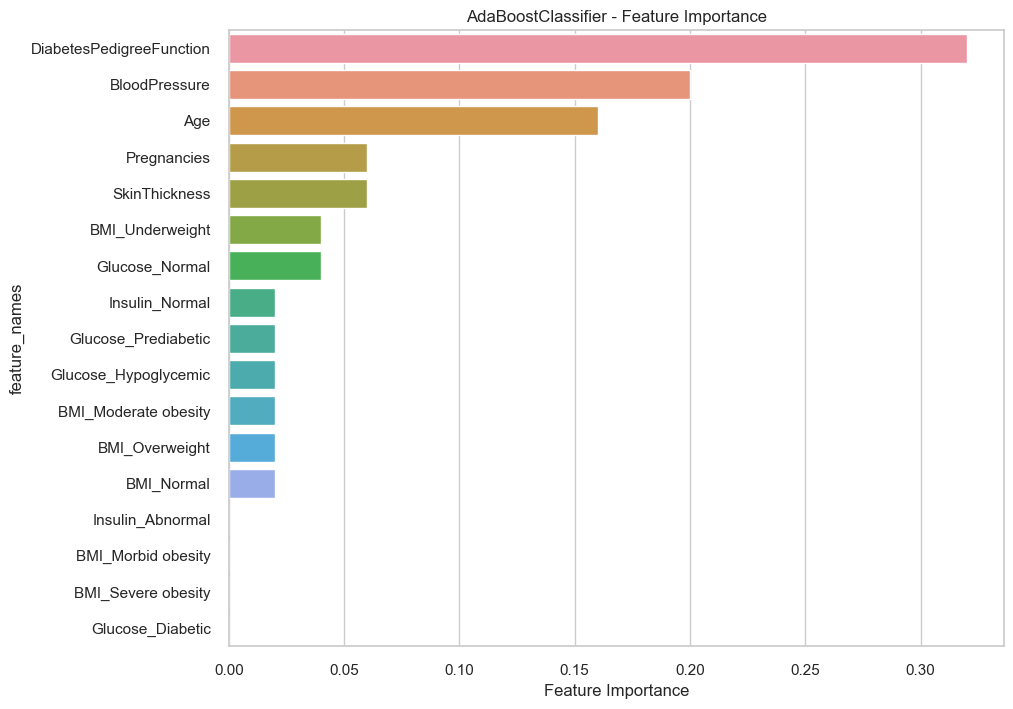



GradientBoostingClassifier Metrics on Test Set:
  Accuracy: 0.8626373626373627
  AUC: 0.9318922835406351
  Recall: 0.9120879120879121
  Precision: 0.83
  F1 Score: 0.869109947643979


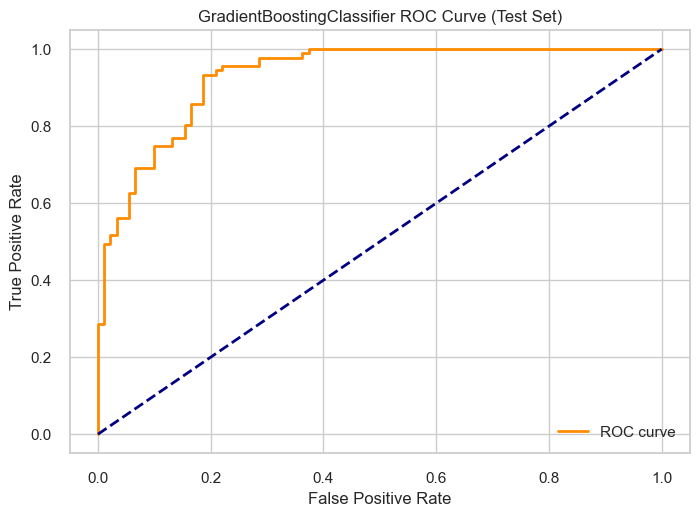

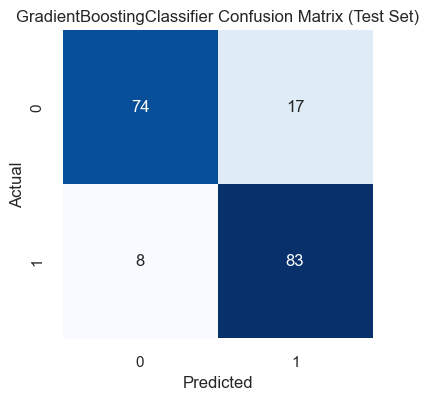

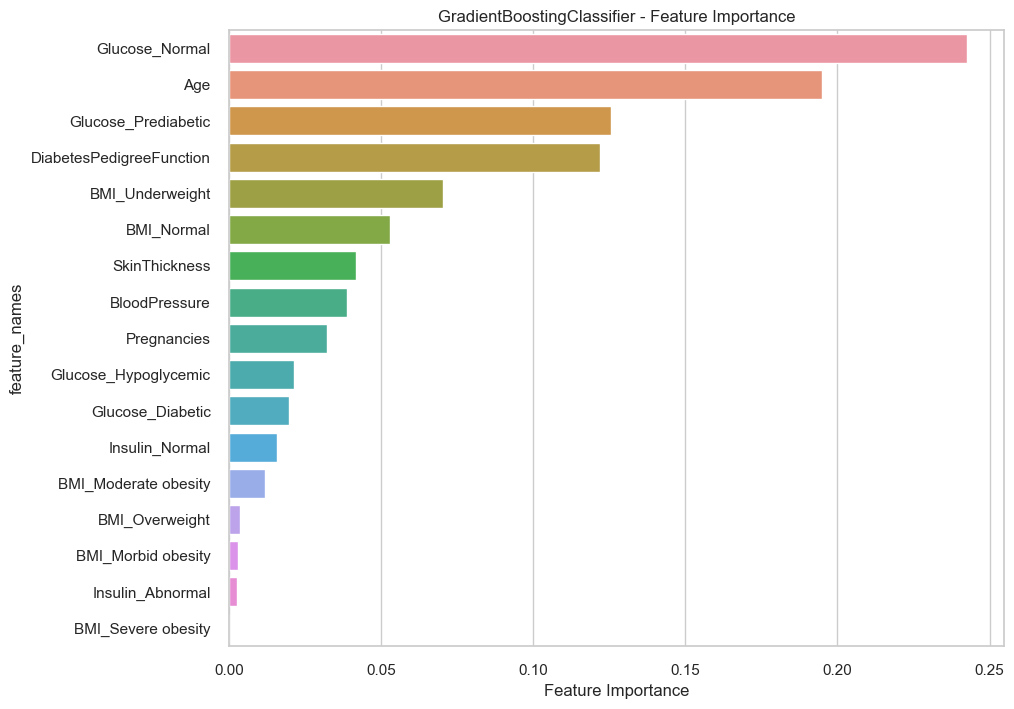



ExtraTreesClassifier Metrics on Test Set:
  Accuracy: 1.0
  AUC: 1.0
  Recall: 1.0
  Precision: 1.0
  F1 Score: 1.0


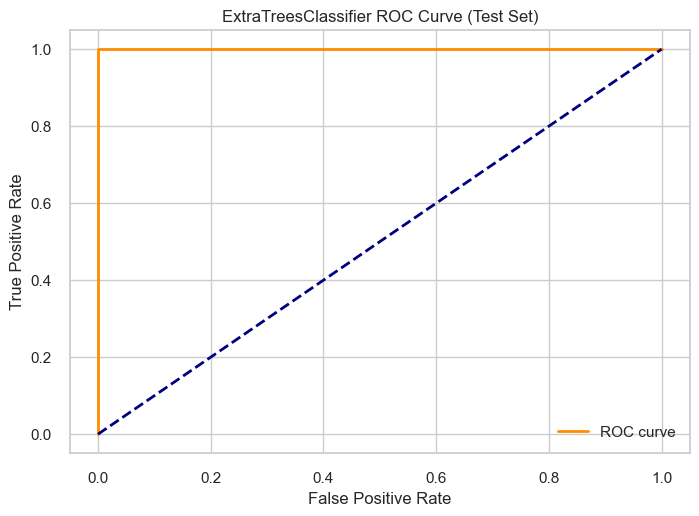

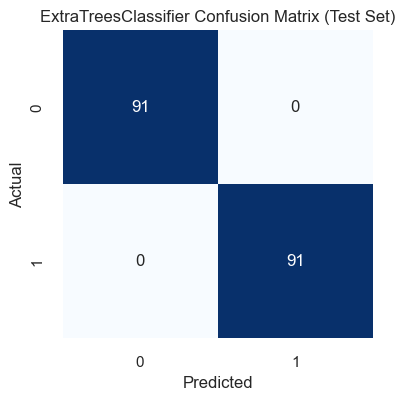

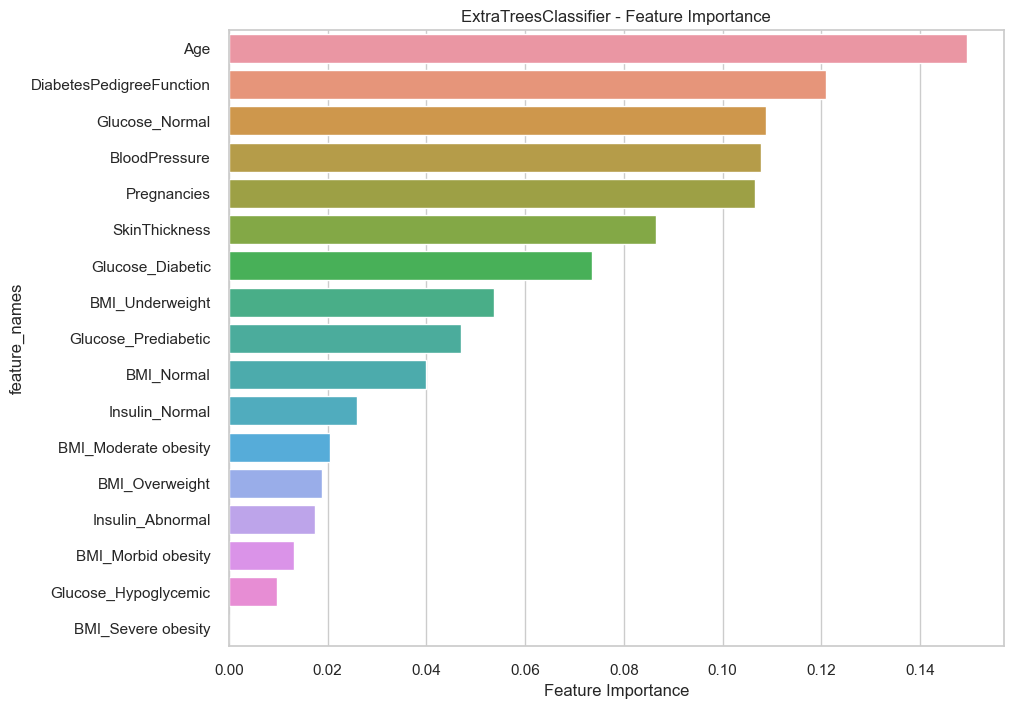



XGBClassifier Metrics on Test Set:
  Accuracy: 0.9945054945054945
  AUC: 1.0
  Recall: 0.989010989010989
  Precision: 1.0
  F1 Score: 0.994475138121547


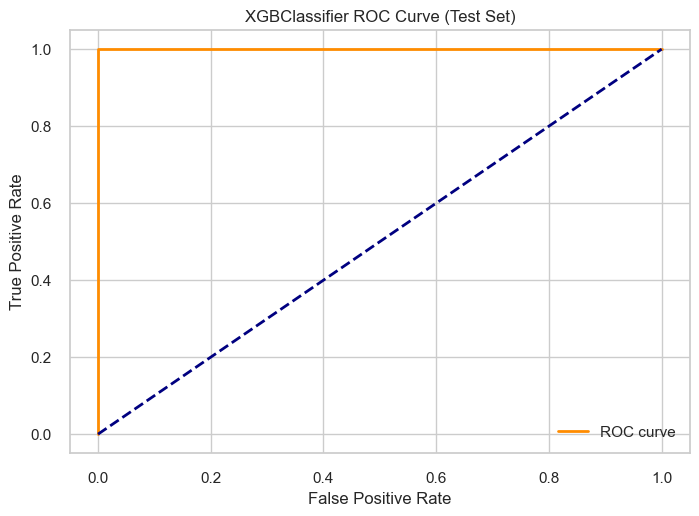

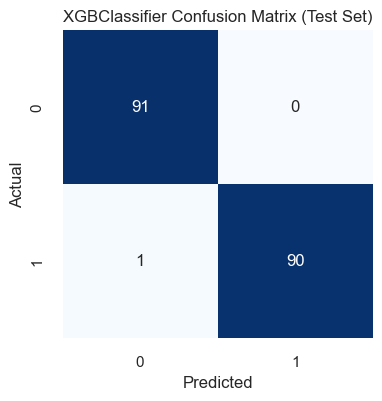

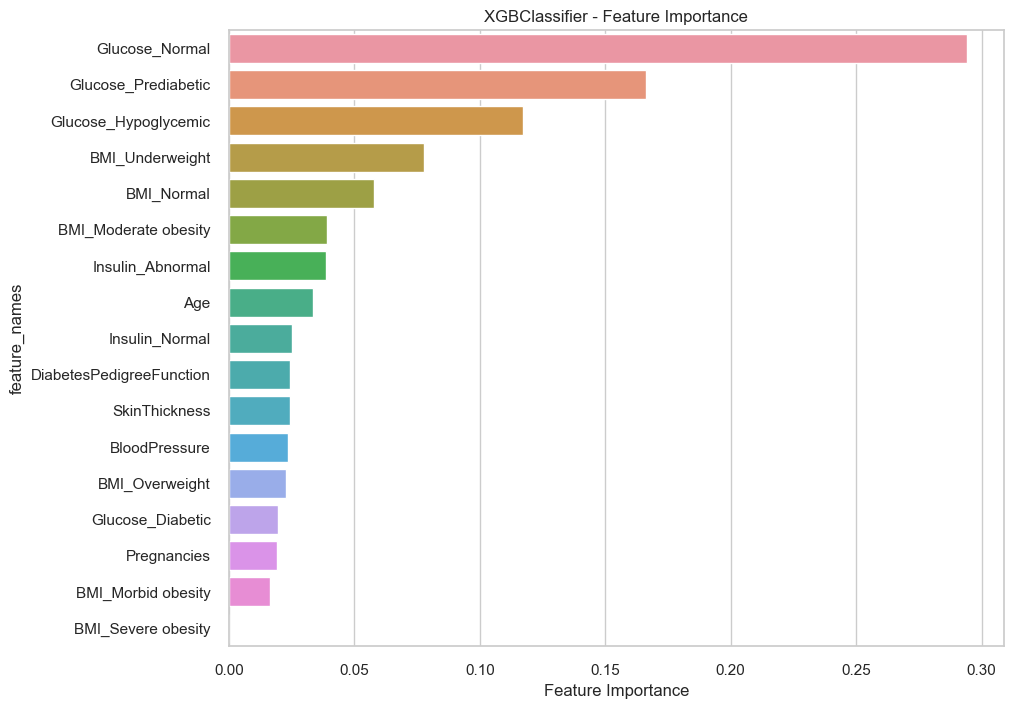



LGBMClassifier Metrics on Test Set:
  Accuracy: 0.978021978021978
  AUC: 0.9995169665499335
  Recall: 1.0
  Precision: 0.9578947368421052
  F1 Score: 0.978494623655914


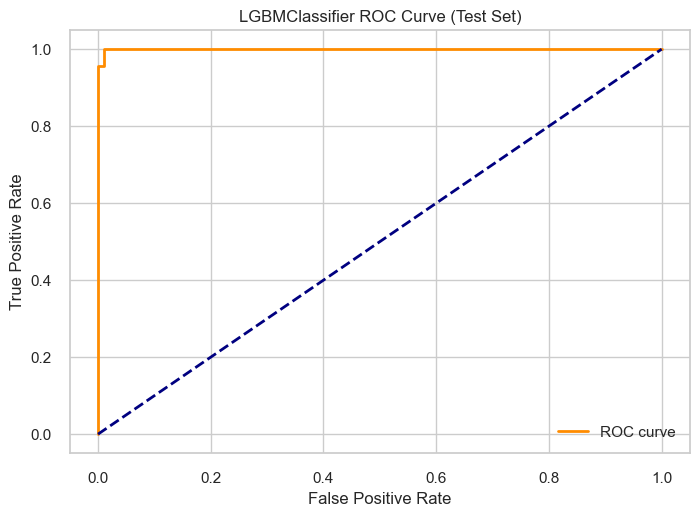

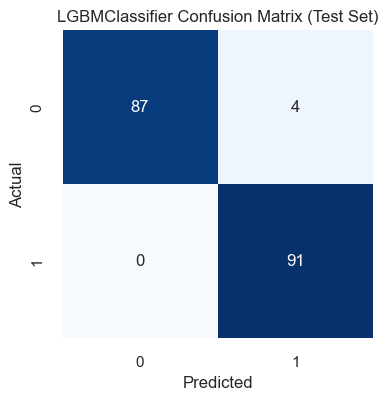

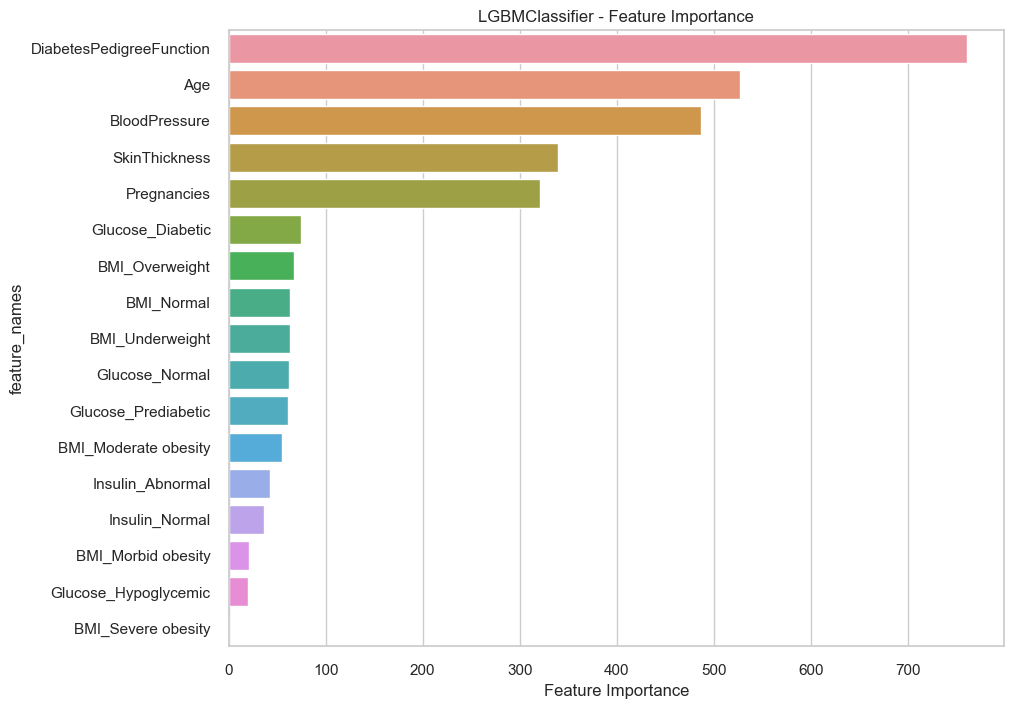



LogisticRegression Metrics on Test Set:
  Accuracy: 0.8021978021978022
  AUC: 0.873928269532665
  Recall: 0.8131868131868132
  Precision: 0.7956989247311828
  F1 Score: 0.8043478260869565


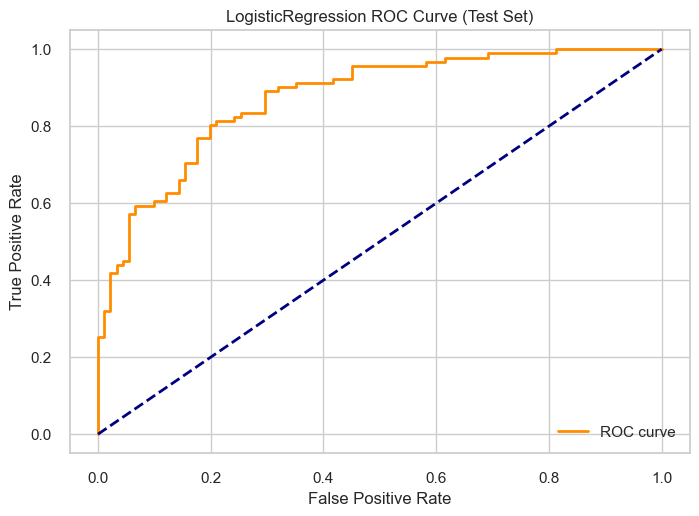

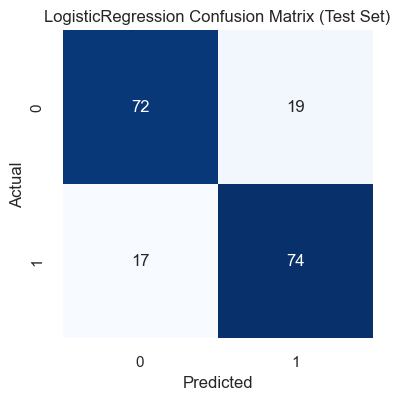



SVC Metrics on Test Set:
  Accuracy: 0.8571428571428571
  AUC: 0.925854365414805
  Recall: 0.8791208791208791
  Precision: 0.8421052631578947
  F1 Score: 0.8602150537634409


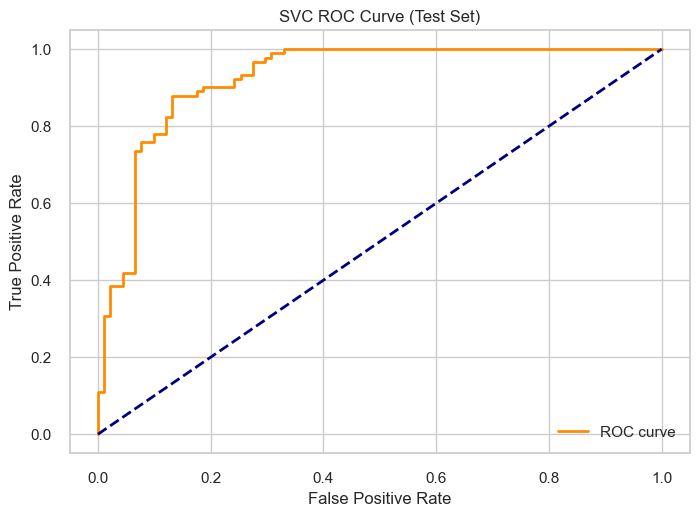

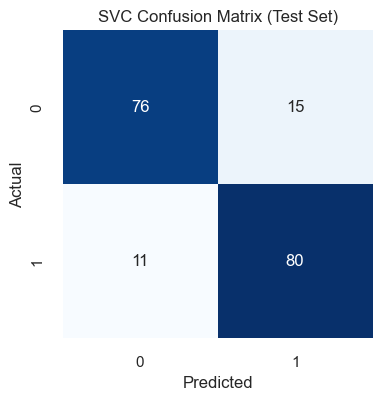

In [64]:
# Dictionary to store all metrics
all_metrics = {}

# Loop through all trained models
for model in trained_models:
    # Get the model name
    model_name = model.__class__.__name__

    # Initialize dictionary for current model
    model_metrics = {}

    # Evaluate the model on the test set
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Store metrics for the current model
    model_metrics['Accuracy'] = accuracy_score(y_test, y_test_pred)
    model_metrics['AUC'] = roc_auc_score(y_test, y_test_prob)
    model_metrics['Recall'] = recall_score(y_test, y_test_pred)
    model_metrics['Precision'] = precision_score(y_test, y_test_pred)
    model_metrics['F1 Score'] = f1_score(y_test, y_test_pred)

    # Store ROC curve for the current model
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    model_metrics['ROC Curve'] = {'fpr': fpr, 'tpr': tpr}

    # Store Confusion Matrix for the current model
    cm_test = confusion_matrix(y_test, y_test_pred)
    model_metrics['Confusion Matrix'] = cm_test

    # Store Feature Importance for the current model (if supported)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        feature_names = list(X.columns)
        data = {'feature_names': feature_names, 'feature_importance': feature_importance}
        fi_df = pd.DataFrame(data)
        fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
        model_metrics['Feature Importance'] = fi_df

    # Store metrics in the overall dictionary
    all_metrics[model_name] = model_metrics

# Plotting
for model_name, model_metrics in all_metrics.items():
    print(f"{model_name} Metrics on Test Set:")
    for metric_name, metric_value in model_metrics.items():
        if metric_name == 'ROC Curve':
            # Plot ROC Curve
            plt.figure()
            plt.plot(metric_value['fpr'], metric_value['tpr'], color='darkorange', lw=2, label='ROC curve')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{model_name} ROC Curve (Test Set)')
            plt.legend(loc="lower right")
            plt.show()
        elif metric_name == 'Confusion Matrix':
            # Plot Confusion Matrix
            plt.figure(figsize=(4, 4))
            sns.heatmap(metric_value, annot=True, fmt="d", cmap="Blues", cbar=False)
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.title(f'{model_name} Confusion Matrix (Test Set)')
            plt.show()
        elif metric_name == 'Feature Importance':
            # Plot Feature Importance
            plt.figure(figsize=(10, 8))
            sns.barplot(x=metric_value['feature_importance'], y=metric_value['feature_names'])
            plt.title(f'{model_name} - Feature Importance')
            plt.xlabel('Feature Importance')
            plt.show()
        else:
            print(f"  {metric_name}: {metric_value}")
    print("\n")


In [65]:
all_metrics 

{'KNeighborsClassifier': {'Accuracy': 0.8626373626373627,
  'AUC': 0.97403695205893,
  'Recall': 0.9120879120879121,
  'Precision': 0.83,
  'F1 Score': 0.869109947643979,
  'ROC Curve': {'fpr': array([0.        , 0.        , 0.05494505, 0.18681319, 0.24175824,
          0.27472527, 1.        ]),
   'tpr': array([0.        , 0.78021978, 0.89010989, 0.91208791, 0.96703297,
          1.        , 1.        ])},
  'Confusion Matrix': array([[74, 17],
         [ 8, 83]], dtype=int64)},
 'GaussianNB': {'Accuracy': 0.6428571428571429,
  'AUC': 0.8525540393672262,
  'Recall': 0.978021978021978,
  'Precision': 0.5855263157894737,
  'F1 Score': 0.7325102880658436,
  'ROC Curve': {'fpr': array([0.        , 0.        , 0.        , 0.        , 0.01098901,
          0.01098901, 0.02197802, 0.02197802, 0.03296703, 0.03296703,
          0.04395604, 0.04395604, 0.04395604, 0.04395604, 0.05494505,
          0.05494505, 0.05494505, 0.05494505, 0.07692308, 0.08791209,
          0.08791209, 0.0989011 , 0.09

In [66]:
# Create an empty DataFrame to store metrics
df_all_metrics = pd.DataFrame()
for model_name, model_metrics in all_metrics.items():
    # Flatten the nested dictionary to make it suitable for a DataFrame
    flattened_metrics = {'Model': model_name}
    for metric_name, metric_value in model_metrics.items():
        # Exclude certain keys from being added to the DataFrame
        if metric_name not in ['ROC Curve', 'Confusion Matrix', 'Feature Importance']:
            flattened_metrics[metric_name] = metric_value

    # Append the flattened metrics to the DataFrame
    df_all_metrics = df_all_metrics.append(flattened_metrics, ignore_index=True)


##### step2: evaluating performance of models on test set

In [67]:
df_all_metrics

,Model,Accuracy,AUC,Recall,Precision,F1 Score
0,KNeighborsClassifier,0.86,0.97,0.91,0.83,0.87
1,GaussianNB,0.64,0.85,0.98,0.59,0.73
2,DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.00
3,RandomForestClassifier,1.00,1.00,1.00,1.00,1.00
4,AdaBoostClassifier,0.81,0.88,0.86,0.79,0.82
5,GradientBoostingClassifier,0.86,0.93,0.91,0.83,0.87
6,ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00
7,XGBClassifier,0.99,1.00,0.99,1.00,0.99
8,LGBMClassifier,0.98,1.00,1.00,0.96,0.98
9,LogisticRegression,0.80,0.87,0.81,0.80,0.80


In [6]:
# Select the relevant columns
columns_of_interest = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC']

# Find the model with the maximum value in each column along with the maximum value
max_model_dict = {}
for column in columns_of_interest:
    max_value = df2[column].max()
    max_model_index = df2[column].idxmax()
    max_model = df2.loc[max_model_index, 'Model']
    max_model_dict[column] = {'Test': max_model, 'Max Test Score': max_value}

# Convert the dictionary to a DataFrame
max_model_df2 = pd.DataFrame(max_model_dict).T.reset_index().rename(columns={'index': 'Metric'})
max_model_df2

,Metric,Test,Max Test Score
0,Accuracy,DecisionTreeClassifier,1.0
1,Recall,DecisionTreeClassifier,1.0
2,Precision,DecisionTreeClassifier,1.0
3,F1 Score,DecisionTreeClassifier,1.0
4,AUC,DecisionTreeClassifier,1.0


##### Note:
- All of the 11 classifiers were tested againist the previously held test data.
- For all evaluation metrices DecisionTreeClassifier showed maximum score(0.99).
- DecisionTreeClassifier performance was best in both corss validation and test set, the best model is DecisionTreeClassifier.

In [7]:
df = pd.merge(max_model_df1, max_model_df2, on='Metric', how='inner')
df

,Metric,Train,Max Train Score,Test,Max Test Score
0,Accuracy,DecisionTreeClassifier,0.99,DecisionTreeClassifier,1.0
1,Recall,RandomForestClassifier,0.99,DecisionTreeClassifier,1.0
2,Precision,DecisionTreeClassifier,0.99,DecisionTreeClassifier,1.0
3,F1 Score,DecisionTreeClassifier,0.99,DecisionTreeClassifier,1.0
4,AUC,DecisionTreeClassifier,0.99,DecisionTreeClassifier,1.0


Above is the overall training and testing evaluation metrices